In [ ]:
import math
import numpy as np
from scipy import stats
#import sympy as smp
from pynverse import inversefunc
import pandas as pd
# from sympy.abc import t, a, b, c, d, e
import emcee
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import seaborn as sns
import Amos_package as ap
from Amos_package import boxplot

# The final version is actually s on the _2 file

In [ ]:
df_microbial_growth = pd.read_csv('../data/modified_Susman18_physical_units.csv')
df_microbial_growth

div_and_fold  fold_growth  division_ratio  added_length  generationtime  \
0             NaN     1.170561             NaN      3.983777        0.750000   
1        1.009831     0.794984        0.456028      3.198324        0.500000   
2        0.862482     0.607893        0.469619      2.291172        0.416667   
3        1.426486     1.037370        0.505526      4.632409        0.833333   
4        0.729601     0.490156        0.446903      2.028413        0.333333   
..            ...          ...             ...           ...             ...   
247      0.940427     0.590789        0.520893      2.192641        0.416667   
248      0.928602     0.604227        0.507478      2.069835        0.500000   
249      1.568073     1.046815        0.550478      4.644408        0.750000   
250      0.809727     0.481681        0.500204      2.215210        0.333333   
251      0.860970     0.711011        0.422863      2.538870        0.500000   

     length_birth  length_final  growth_rate  lineage_ID  generation  \
0        1.791428      5.775204     1.560748        15.0         0.0   
1        2.633655      5.831979     1.589968        15.0         1.0   
2        2.738808      5.029980     1.458944        15.0         2.0   
3        2.542786      7.175195     1.244844        15.0         3.0   
4        3.206619      5.235033     1.470468        15.0         4.0   
..            ...           ...          ...         ...         ...   
247      2.722385      4.915026     1.417893        15.0       249.0   
248      2.494268      4.564104     1.208453        15.0       250.0   
249      2.512440      7.156848     1.395754        15.0       251.0   
250      3.579885      5.795095     1.445043        15.0       252.0   
251      2.450531      4.989402     1.422022        15.0       253.0   

     start_time    end_time  
0      0.250000    1.000000  
1      1.083333    1.583333  
2      1.666667    2.083333  
3      2.166667    3.000000  
4      3.083333    3.416667  
..          ...         ...  
247  150.583333  151.000000  
248  151.083333  151.583333  
249  151.666667  152.416667  
250  152.500000  152.833333  
251  152.916667  153.416667  

[252 rows x 12 columns]

In [ ]:
print(df_microbial_growth['lineage_ID'].nunique())

1


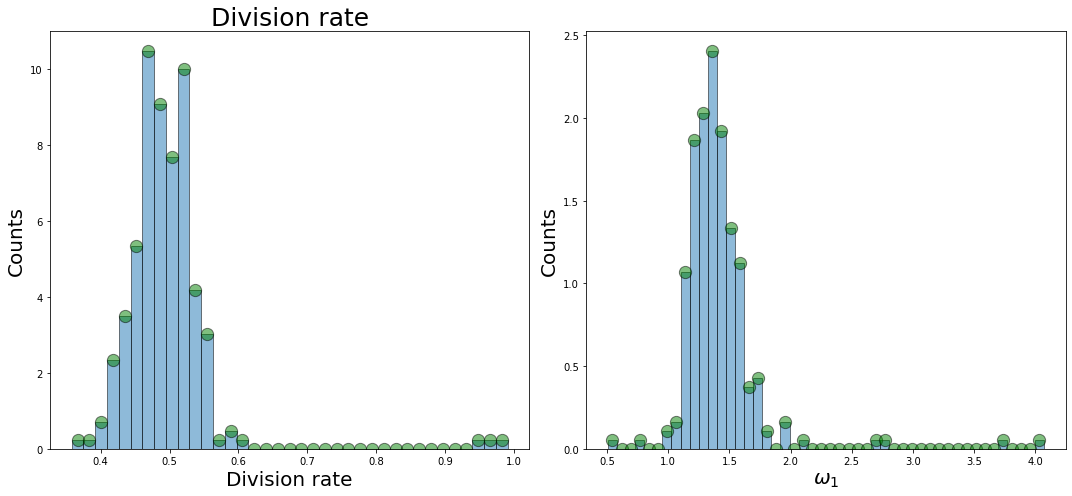

In [ ]:
fig, ax = plt.subplots(1,2 , figsize=(15, 7))
hist_val_div = ax[0].hist(df_microbial_growth['division_ratio'], bins='fd', edgecolor='black', alpha=0.5, density=True)
div_centers = (hist_val_div[1][:-1] + hist_val_div[1][1:]) / 2
ax[0].scatter(div_centers, hist_val_div[0], s=150, color='green', alpha=0.5, edgecolor='black')
ax[0].set_xlabel('Division rate', fontsize=20)
ax[0].set_ylabel('Counts', fontsize=20)
ax[0].set_title('Division rate', fontsize=25)
hist_val_grow = ax[1].hist(df_microbial_growth['growth_rate'], bins='fd', edgecolor='black', alpha=0.5, density=True)
grow_centers = (hist_val_grow[1][:-1] + hist_val_grow[1][1:]) / 2
ax[1].scatter(grow_centers, hist_val_grow[0], s=150, color='green', alpha=0.5, edgecolor='black')
ax[1].set_xlabel('$\\omega_1$', fontsize=20)
ax[1].set_ylabel('Counts', fontsize=20)
fig.tight_layout()


In [ ]:
def fit_beta(x, a, b):
    return(scp.stats.beta.pdf(x, a=a,b=b))

In [ ]:
popt, pcov = scp.optimize.curve_fit(fit_beta, xdata=div_centers, ydata = hist_val_div[0])

The values of the beta distribution a is= 76.6 +- 6.0
The values of the beta distribution b is= 79.6 +- 6.2


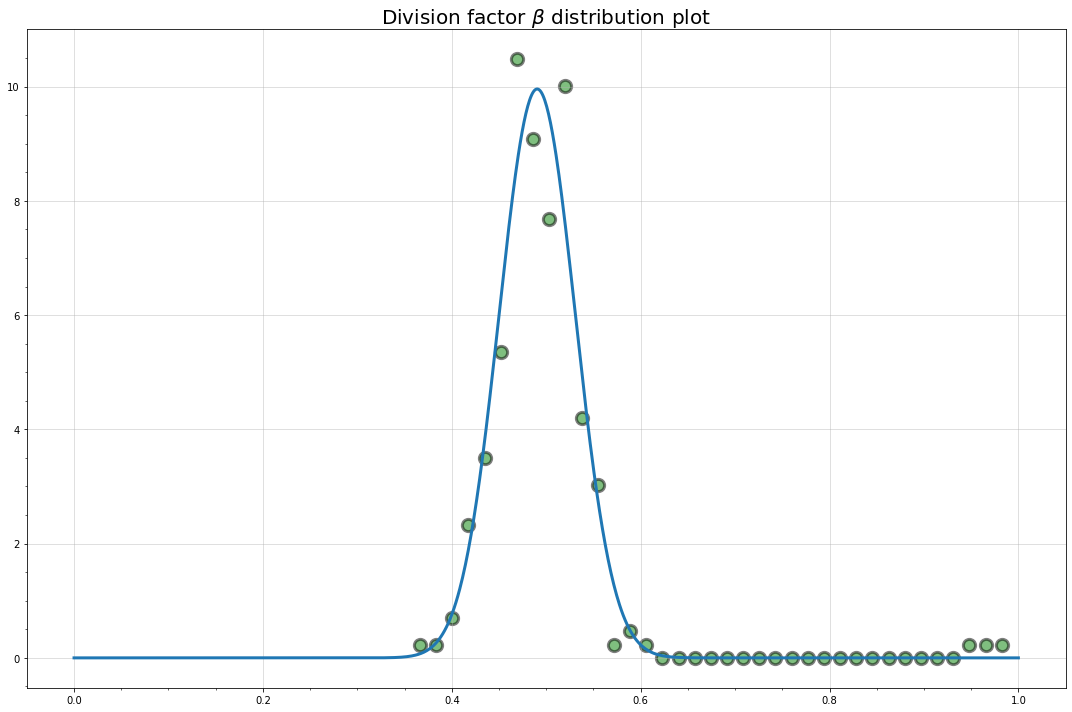

In [ ]:
x_axis = np.linspace(0,1,1000)
fig, ax = plt.subplots(1,1 , figsize=(15, 10))
ax.plot(x_axis, scp.stats.beta.pdf(x_axis, a=popt[0],b=popt[1]), linewidth=3)
ax.scatter(div_centers, hist_val_div[0], linewidth=3, s=150, color='green', edgecolor = 'black', alpha=0.5)
ax.grid(alpha=0.5)
ax.set_title('Division factor $\\beta$ distribution plot', fontsize=20)
ax.minorticks_on()
fig.tight_layout()

a_beta = popt[0]
b_beta = popt[1]
print('The values of the beta distribution a is=', np.round(a_beta,1),'+-', np.round(np.sqrt(pcov)[0,0],1))
print('The values of the beta distribution b is=', np.round(b_beta,1),'+-', np.round(np.sqrt(pcov)[1,1],1))



In [ ]:
def fit_gamma(x, a, teta):
    return(scp.stats.gamma.pdf(x, a=a, scale=teta))


In [ ]:
popt, pcov = scp.optimize.curve_fit(fit_gamma, xdata=grow_centers, ydata = hist_val_grow[0])

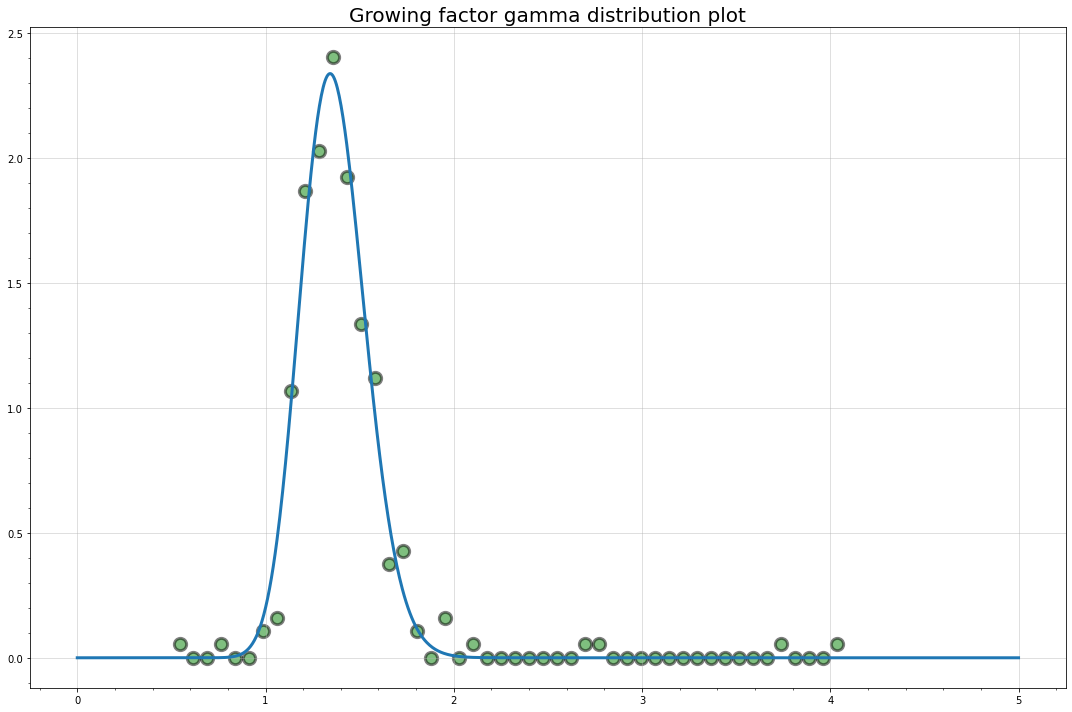

In [ ]:
x_axis = np.linspace(0,5,1000)
fig, ax = plt.subplots(1,1 , figsize=(15, 10))
ax.plot(x_axis, scp.stats.gamma.pdf(x_axis, a=popt[0], scale=popt[1]), linewidth=3)
ax.scatter(grow_centers, hist_val_grow[0], linewidth=3, s=150, color='green', edgecolor = 'black', alpha=0.5)
ax.grid(alpha=0.5)
ax.set_title('Growing factor gamma distribution plot', fontsize=20)
ax.minorticks_on()
fig.tight_layout()




In [ ]:
a_gamma = popt[0]
teta_gamma = popt[1]
print('The values of the beta distribution a is a =', np.round(a_gamma,1),'+-', np.round(np.sqrt(pcov[0,0]),1))
print('The values of the beta distribution b is b =', np.round(teta_gamma,3),'+-', np.round(np.sqrt(pcov[1,1]),3))

The values of the beta distribution a is a = 63.2 +- 2.7
The values of the beta distribution b is b = 0.022 +- 0.001


In [ ]:
np.random.seed(seed=123)

size = len(df_microbial_growth['generationtime']) # length of the time series (= number of divisions)
s_drawn = np.random.uniform(low=0, high = 1, size = size)
print('Some drawn values of s:', s_drawn[:5])

Some drawn values of s: [0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]


In [ ]:
# define the distributions
def prior_omega2(omega2):
    return(stats.lognorm.pdf(omega2, s=np.sqrt(1/3 - np.log(0.9)), loc=0, scale=np.exp(1/3 )))

def prior_mu(mu):
    return(stats.beta.pdf(mu, a=2, b=5))

def prior_nu(nu):
    return(stats.lognorm.pdf(nu, s=1/3, loc=0.1, scale=np.exp(1/9)))

def prior_omega1(omega1):
    return(scp.stats.gamma.pdf(omega1, a=a_gamma, scale=teta_gamma))

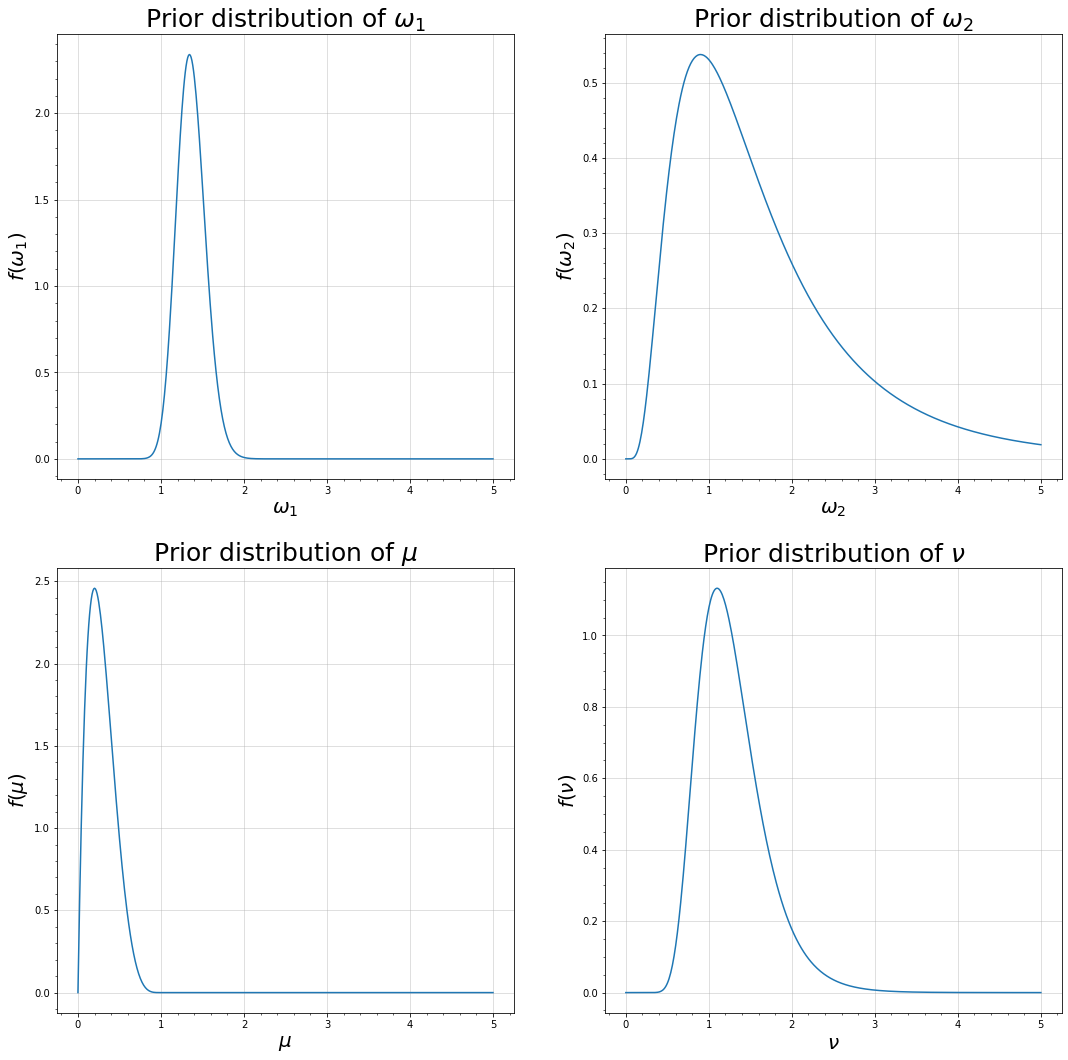

In [ ]:
x = np.linspace(0, 5, 500)

_, ax = plt.subplots(2, 2, figsize=(18, 18))
ax[0, 0].plot(x, prior_omega1(x))
ax[0, 1].plot(x, prior_omega2(x)) 
ax[1, 0].plot(x, prior_mu(x)) 
ax[1, 1].plot(x, prior_nu(x))

param_str = [['$\omega_1$', '$\omega_2$'], ['$\mu$', '$\\nu$']]

for i in range(2):
    for j in range(2):
        ax[i, j].set_title('Prior distribution of ' + param_str[i][j], fontsize=25)
        ax[i, j].set_xlabel(param_str[i][j], fontsize=20)
        ax[i, j].set_ylabel('$f($'+param_str[i][j]+'$)$', fontsize=20)
        ax[i, j].minorticks_on()
        ax[i, j].grid(alpha=0.5)

## Starting model

In [ ]:
'''
Cell size evolution x(t)
'''
def x_function(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    x = (xb+mu/omega1)*np.exp(omega1*t)-mu/omega1
    return x
    
'''
Hazard rate function h(t)
'''
def h(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    h = omega2*(1+x_function(t, pars)/nu)
    return h

'''
Survival function s(t)
'''
def CDF(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    s = np.exp(omega2*t*(mu/nu - 1) + (omega1/omega2)*((mu + xb)/nu)*(1-np.exp(omega1*t)))
    return s

In [ ]:
points_per_evolution=100     # number of time points between 2 divisions
omg1 = np.random.gamma(shape=a_gamma, scale=teta_gamma, size=size)
frac = np.random.beta(a_beta, b_beta, size=size)
xb = df_microbial_growth['length_birth'][0]

In [ ]:
def sim_t_draw(CDF, x_function, points_per_evolution, xb, model, pars=(1,0.9,0.1,1,1)):
    '''
    Find tau numerically
    '''
    def draw_tau_numerical(K, parameters=pars):
        (omega1, omega2, mu, nu, xb) = parameters
        if model =='s':
            t0 = max([0,0])
        elif model == '1':
            t0 = max([0, (1.0/omega1) * np.log(mu/xb)])
        elif model == '2':
            t0 = max([0, (1.0/omega1) * np.log(1 + (mu/xb))])
        else:
            raise Exception("Model has to be either 's', '1', or '2' ")
            
        t_max = 8/omega1 # approx. 5 tau to avoid roundoff error
        tau = inversefunc(CDF, args=(parameters,), y_values=K,  domain=[t0, t_max], open_domain=True)
        
        
        return tau

    t = 0


    all_times = np.zeros(points_per_evolution*size)
    cell_sizes = np.zeros(points_per_evolution*size)
    sim_t_starting = []

    for i in range(size): 
        parameters = (omg1[i],0.9,0.1,1,xb) # omega1, omega2, mu, nu, xb
        tau = draw_tau_numerical(s_drawn[i], parameters=parameters)
        sim_t_starting.append(tau)

        # evolution
        times = np.linspace(0, tau, points_per_evolution)
        xt = x_function(times, parameters)
        
        # store times and sizes
        all_times[i*points_per_evolution : (i+1)*points_per_evolution] = np.linspace(t, t+tau, points_per_evolution)
        cell_sizes[i*points_per_evolution : (i+1)*points_per_evolution] = xt

        # update the initial time and the starting size
        xb = xt[-1]*frac[i]
        t = t+tau

    sim_t_starting = np.array(sim_t_starting)

    return sim_t_starting, all_times, cell_sizes


In [ ]:
def plot_evol(all_times, cell_sizes):
    fig, ax = plt.subplots(1,1 , figsize=(25, 10))
    ax.plot(all_times, cell_sizes, linewidth=3, color='C0')
    ax.set_title('Cell size evolution', fontsize=25)
    ax.set_xlabel('t', fontsize = 20)
    ax.set_ylabel('Cell size', fontsize=20)
    ax.minorticks_on()
    ax.grid(alpha=0.5)
    return fig, ax


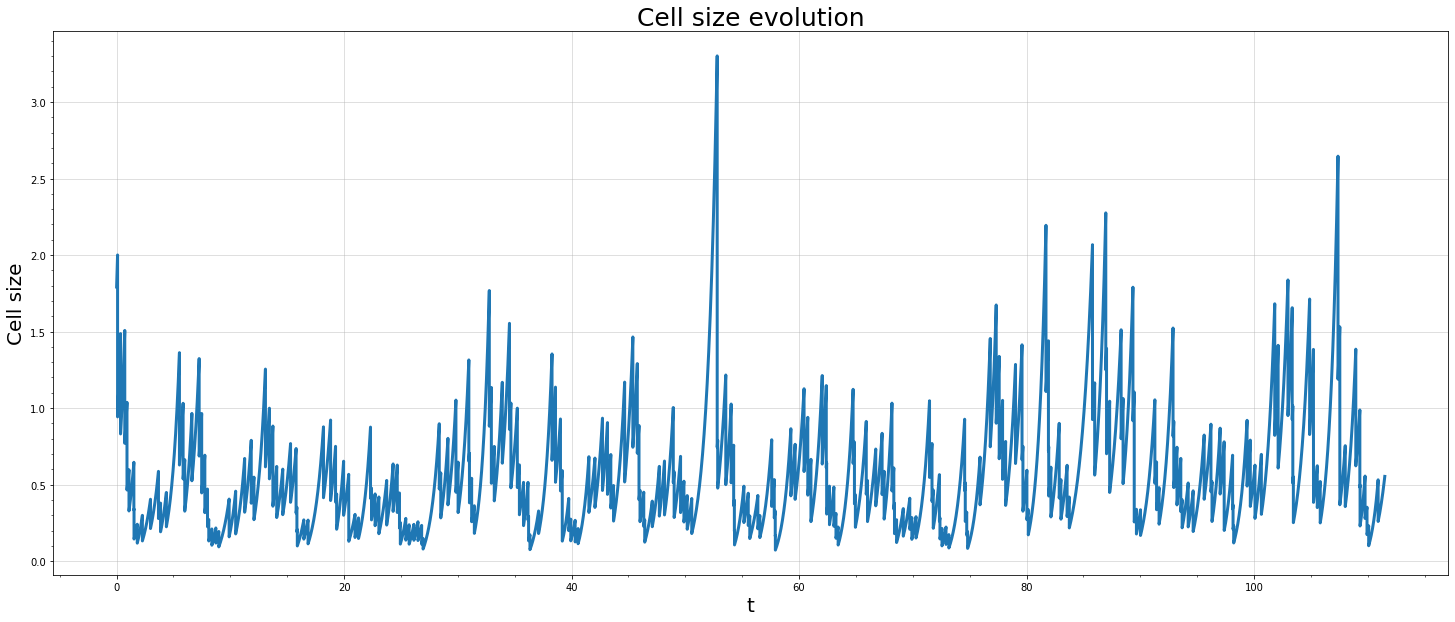

In [ ]:
sim_t_starting, all_times_starting, cell_sizes_starting = sim_t_draw(CDF=CDF, x_function=x_function, points_per_evolution=points_per_evolution, xb=xb, model = 's')

fig, ax = plot_evol(all_times=all_times_starting, cell_sizes=cell_sizes_starting)



In [ ]:
def PDF(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    unnormalized = h(t, pars)*CDF(t, pars)
    idx = np.argsort(t)
    normalization = np.trapz(x=t[idx], y=unnormalized[idx])

    return(unnormalized/normalization)

In [ ]:
n_walkers = 20
ndim = 3

def j_log_unnorm_posterior_emcee(params, y_times, PDF):
    
    try:
        omega_1, omega_2, u, nu = np.array(params)
        ret = np.sum(np.log(PDF(y_times, pars=(omega_1, omega_2, u, nu, 1)))) + np.log(prior_mu(u)) + np.log(prior_omega1(omega_1)) + + np.log(prior_omega2(omega_2)) 
    
        if ret*0 ==0:
            return(ret)
        else:return(-np.inf)
    
        
        #return(log_likelihood(y_times, pars=(1, omega_2, u, 1, 1)) + np.log(prior_omega2(omega_2)) + np.log(prior_mu(u)) + np.log(prior_omega1(omega_1))
    except:
        #omega_1, omega_2, u = np.array([0.00001, 0.000001, 0.00001])
        return(-np.inf)
    
    


In [ ]:
p0_u = np.random.uniform(low=0.01, high=0.15, size=n_walkers).reshape(-1, 1)
p0_omega_2 =np.random.uniform(low=0.5, high=1.2, size=n_walkers).reshape(-1, 1)

p0_omega_1 = np.random.gamma(shape=a_gamma, scale=teta_gamma, size=n_walkers).reshape(-1, 1)

p0_omega_1[p0_omega_1 > 1.7] = a_gamma*teta_gamma
p0_omega_1[p0_omega_1 < 1] = a_gamma*teta_gamma

p0_nu = np.random.uniform(low=0.6, high=1.3, size=n_walkers).reshape(-1, 1)

p0 = np.hstack([p0_omega_1, p0_omega_2, p0_u, p0_nu])



sampler = emcee.EnsembleSampler(n_walkers, 4, j_log_unnorm_posterior_emcee, kwargs={'y_times':sim_t_starting, 'PDF':PDF}, a=2)
'''
3   is the number of dimensions in the parameter space
a=2 is the proposal scale parameter. (default: 2.0)
'''

pos, prob, state = sampler.run_mcmc(p0, 200)
sampler.reset()
sampler.run_mcmc(pos, 5000, rstate0=state)

chain = sampler.get_chain(flat=True)

'''
p0   is the initial state
5000 is the number of steps to run
'''

<ipython-input-115-5126f659f8d6>:8: RuntimeWarning: divide by zero encountered in log
  ret = np.sum(np.log(PDF(y_times, pars=(omega_1, omega_2, u, nu, 1)))) + np.log(prior_mu(u)) + np.log(prior_omega1(omega_1)) + + np.log(prior_omega2(omega_2))
<ipython-input-115-5126f659f8d6>:10: RuntimeWarning: invalid value encountered in double_scalars
  if ret*0 ==0:
<ipython-input-109-0729c5d6e9ad>:25: RuntimeWarning: overflow encountered in exp
  s = np.exp(omega2*t*(mu/nu - 1) + (omega1/omega2)*((mu + xb)/nu)*(1-np.exp(omega1*t)))
<ipython-input-114-325457283768>:8: RuntimeWarning: invalid value encountered in true_divide
  return(unnormalized/normalization)
<ipython-input-115-5126f659f8d6>:8: RuntimeWarning: invalid value encountered in log
  ret = np.sum(np.log(PDF(y_times, pars=(omega_1, omega_2, u, nu, 1)))) + np.log(prior_mu(u)) + np.log(prior_omega1(omega_1)) + + np.log(prior_omega2(omega_2))


'\np0   is the initial state\n5000 is the number of steps to run\n'

In [ ]:
def plot_func(chain, true_value, parameter, x_median=-0.1, y_median=2.26, x_max=0.02, \
            y_max=2.2, true_x = 0.08, true_y = 1.8):
    if parameter == 'omega_1':
        index = 0
    elif parameter == 'omega_2':
        index = 1
    elif parameter == 'mu':
        index = 2
    elif parameter == 'nu':
        index = 3
    else:
        return 'The parameter should be chose between [omega_1, omega_2, mu, nu]'

    fig, ax = plt.subplots(1,1 , figsize=(15, 10))
    res_omega_1 = ax.hist(chain[:,index], bins='fd', edgecolor='black', alpha=0.5, density=True)

    counts_omega_1 = res_omega_1[0]
    edges_omega_1 = res_omega_1[1]
    patches_omega_1 = res_omega_1[2]
    centers_omega_1 = (edges_omega_1[:-1] + edges_omega_1[1:]) / 2

    tmp = np.cumsum(np.diff(edges_omega_1)*counts_omega_1)

    max_index = np.argmax(counts_omega_1)
    max_omega_1 = (edges_omega_1[max_index] + edges_omega_1[max_index + 1])/2
    median_omega_1 = (edges_omega_1[len(tmp[tmp<0.5])+1] + edges_omega_1[len(tmp[tmp<0.5])+2])/2
    print('Median value of omega_1:', round(median_omega_1, 4))
    for i in range(len(tmp[tmp<0.025])):
        patches_omega_1[i].set_facecolor('green')
    for i in range(len(tmp[tmp<0.975]), len(tmp)):
        patches_omega_1[i].set_facecolor('green')

    ax.minorticks_on()
    ax.set_ylabel('Counts', fontsize=15)
    ax.set_xlabel(f'$\\{parameter}$', fontsize=15)
    ax.set_title(f'$\\{parameter}$ posterior', fontsize=20)
    ax.axvline(median_omega_1, color='crimson', linestyle='dashed',  linewidth=3, label='median $\omega_1$ = ' + str(round(median_omega_1, 4)))
    ax.axvline(max_omega_1, color='darkgreen', linestyle='dashed',  linewidth=3, label='max $\omega_1$ = ' + str(round(max_omega_1, 4)))
    ax.axvline(true_value, color='blueviolet', linestyle='dashed',  linewidth=3, label='true $\omega_1$ = 1')

    ax.text(median_omega_1+x_median, y_median, f'median $\{parameter}$' , color='crimson', fontsize=17)
    ax.text(max_omega_1+x_max, y_max, f'max $\{parameter}$', color='darkgreen', fontsize=17)
    ax.text(true_value - true_x, true_y, f'true $\{parameter}$', color='blueviolet', fontsize=17)


    print('Max value of omega_1:', round(max_omega_1, 4))


    ax.legend(fontsize=17, facecolor='aliceblue', shadow = True, edgecolor='black')

    return fig, ax, centers_omega_1, counts_omega_1

Median value of omega_1: 1.3739
Max value of omega_1: 1.3855


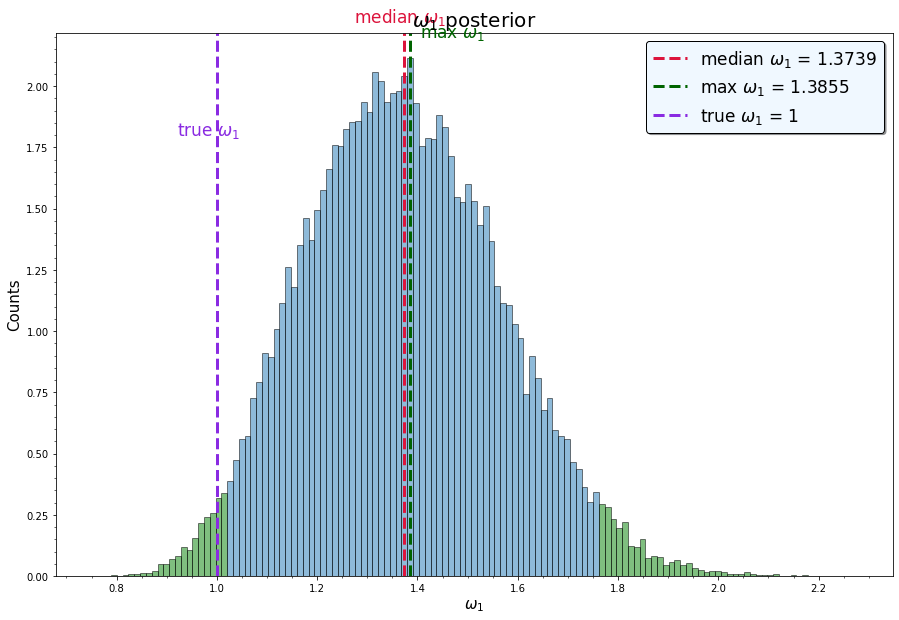

In [ ]:
fig, ax, centers, counts = plot_func(chain= chain, true_value=1, parameter='omega_1')

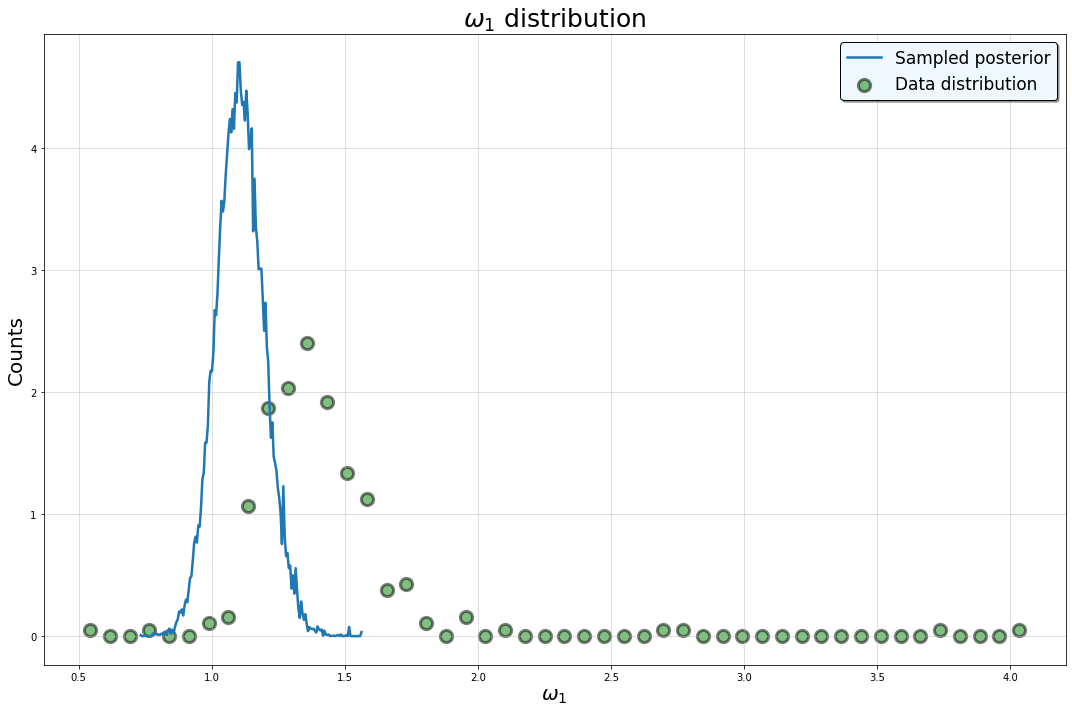

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(15, 10))
ax.plot(centers, counts, label = 'Sampled posterior', linewidth=2.5)
ax.scatter(grow_centers, hist_val_grow[0], linewidth=3, s=150, color='green', edgecolor = 'black', alpha=0.5, label='Data distribution')
ax.legend(fontsize=17, facecolor='aliceblue', shadow = True, edgecolor='black')
ax.grid(alpha=0.5)
ax.set_xlabel('$\omega_1$', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.set_title('$\omega_1$ distribution', fontsize = 25)
fig.tight_layout()

Median value of omega_1: 2.7103
Max value of omega_1: 2.3027


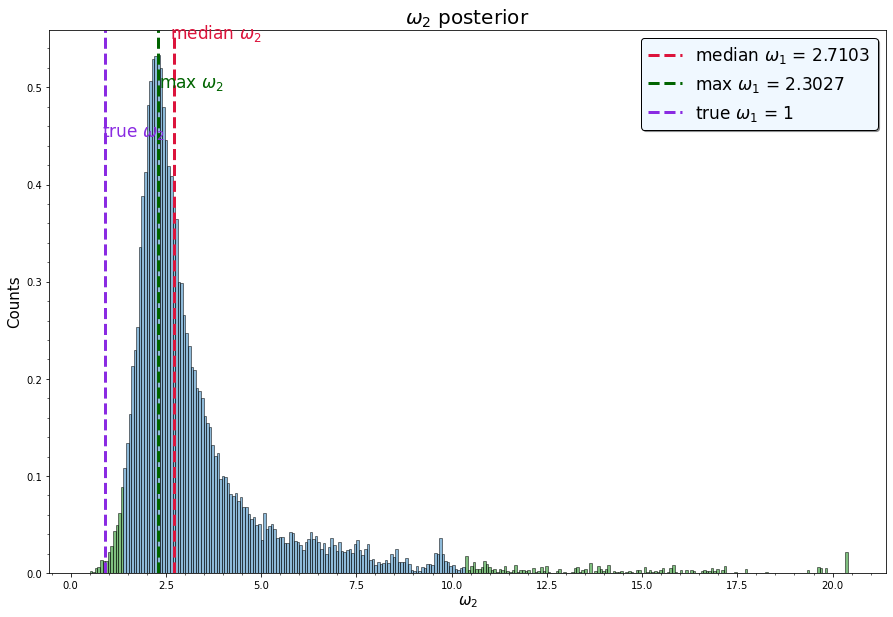

In [ ]:
fig, ax, _, _ = plot_func(chain= chain, true_value=0.9, parameter = 'omega_2', y_max=0.5, y_median=0.55, true_y = 0.45)

Median value of omega_1: 0.3871
Max value of omega_1: 0.3238


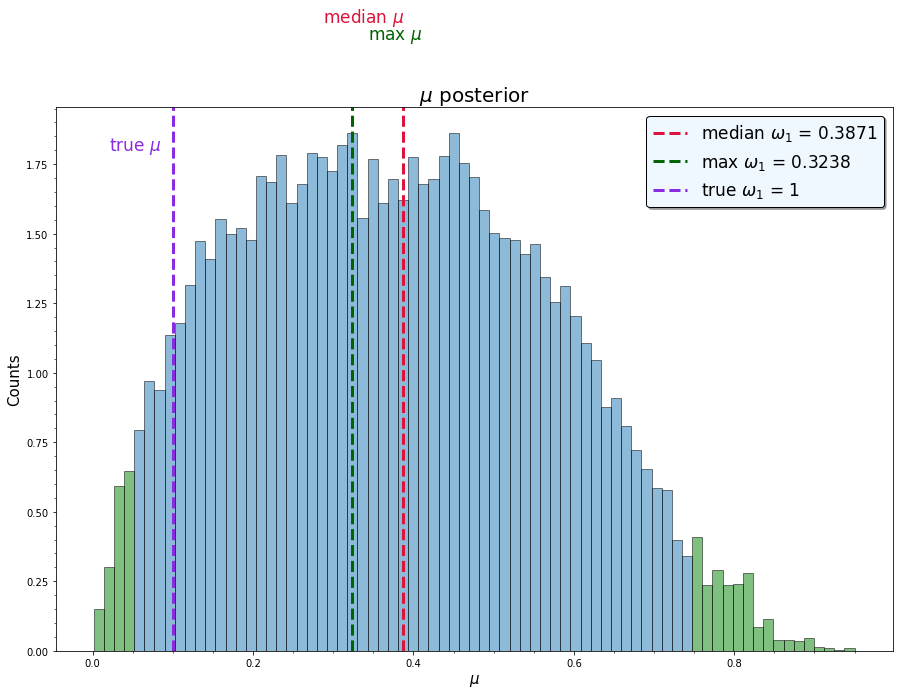

In [ ]:
fig, ax, _, _ = plot_func(chain= chain, true_value=0.1, parameter='mu')

Median value of omega_1: 1.3896
Max value of omega_1: 1.0979


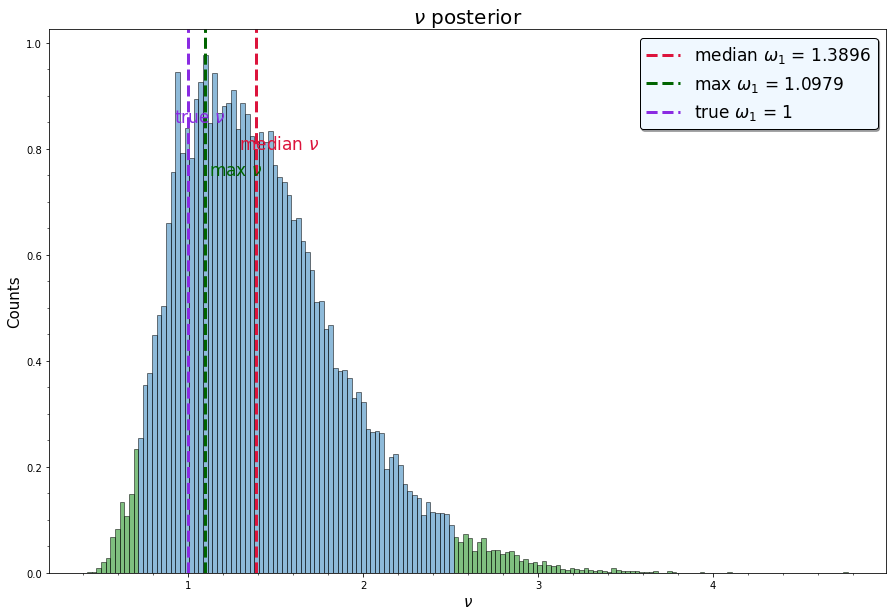

In [ ]:
fig, ax, _, _ = plot_func(chain= chain, true_value=1, parameter='nu', y_max=0.75, y_median=0.8, true_y = 0.85)

In [ ]:
def pairplot(chain):
    chain_df = pd.DataFrame(chain, columns=['omega1', 'omega2', 'mu', 'nu'])
    g = sns.pairplot(chain_df, diag_kind="hist", corner=True, plot_kws={'color':'green', 'edgecolor':'black', 'alpha':0.3}, diag_kws={'color':'green', 'alpha':0.5})
    g.map_lower(sns.kdeplot, levels=5, color="firebrick", linewidth=2)
    axes = g.axes.ravel()
    axes_2 = []
    for ax in axes:
        if ax != None:
            axes_2.append(ax)
    axes_2
    axes_2[0].vlines(x=1, ymin=0, ymax=1, color='navy')
    axes_2[1].vlines(x=1, ymin=0, ymax=np.max(chain[:,1]), linewidth=2, color='navy')
    axes_2[2].set_ylim(bottom=0)
    axes_2[4].set_ylim(bottom=0)
    axes_2[6].set_ylim(bottom=0)
    axes_2[0].set_ylim(bottom=0)

    axes_2[1].hlines(y=0.9, xmin=0, xmax=2, linewidth=2, color='navy')
    axes_2[2].vlines(x=0.9, ymin=0, ymax=6, linewidth=2, color='navy')
    axes_2[3].vlines(x=1, ymin=-0.1, ymax=np.max(chain[:,2])+0.1, linewidth=2, color='navy')
    axes_2[3].hlines(y=0.1, xmin=0, xmax=2, linewidth=2, color='navy')

    axes_2[4].vlines(x=0.9, ymin=-0.1, ymax=np.max(chain[:,2])+0.1, linewidth=2, color='navy')
    axes_2[4].set_ylim(bottom=-0.1, top=0.6)
    axes_2[4].hlines(y=0.1, xmin=0, xmax=np.max(chain[:,1]), linewidth=2, color='navy')

    axes_2[5].vlines(x=0.1, ymin=-0.1, ymax=0.5, linewidth=2, color='navy')
    axes_2[6].vlines(x=1, ymin=0, ymax=np.max(chain[:,0]), linewidth=2, color='navy')
    axes_2[6].hlines(y=1, xmin=0, xmax=2, linewidth=2, color='navy')

    axes_2[6].set_xlim(left=0)
    axes_2[7].vlines(x=0.9, ymin=0, ymax=np.max(chain[:,1]), linewidth=2, color='navy')
    axes_2[7].hlines(y=1, xmin=0, xmax=np.max(chain[:,1]), linewidth=2, color='navy')
    axes_2[8].vlines(x=0.1, ymin=0, ymax=np.max(chain[:,3]), linewidth=2, color='navy')

    axes_2[8].hlines(y=1, xmin=-0.1, xmax=np.max(chain[:,2]), linewidth=2, color='navy')
    axes_2[8].set_xlim(left=-0.1)
    axes_2[9].vlines(x=1, ymin=0, ymax=np.max(chain[:,3]), linewidth=2, color='navy')
    return g

### Actung !

/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: Th

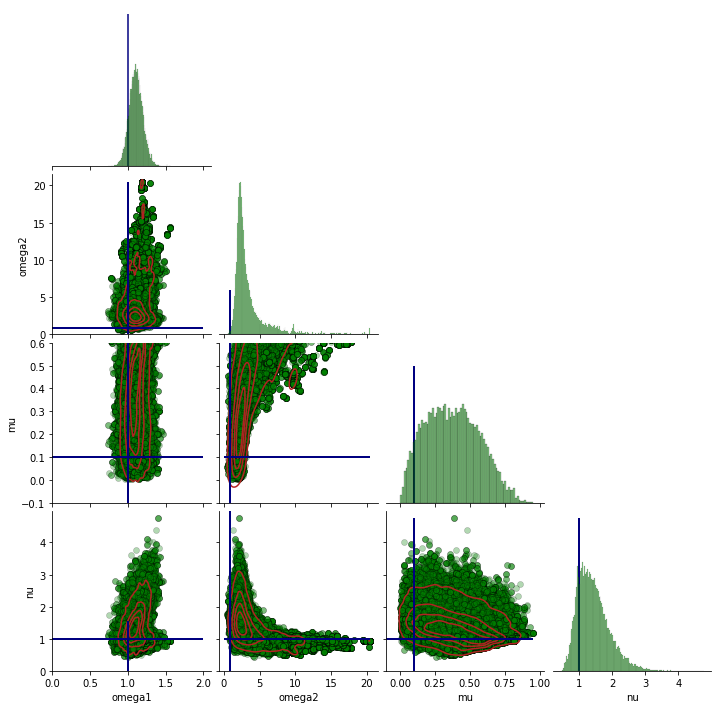

In [ ]:
g = pairplot(chain=chain)

In [ ]:
def chains_plot(chain):
    fig , ax = plt.subplots(4,1, figsize=(25, 30))

    title_list = ['$\omega_1$', '$\omega_2$', '$\mu$', '$\\nu$']
    for i, i_title in zip(range(4), title_list):
        ax[i].scatter(range(0,chain.shape[0]) , chain[:,i], s=1)
        ax[i].set_ylabel('Value of the chain', fontsize=15)
        ax[i].set_xlabel('Iteration Step', fontsize=15)
        ax[i].set_title('Chain of '+i_title, fontsize=18)
        ax[i].minorticks_on()
    return fig, ax

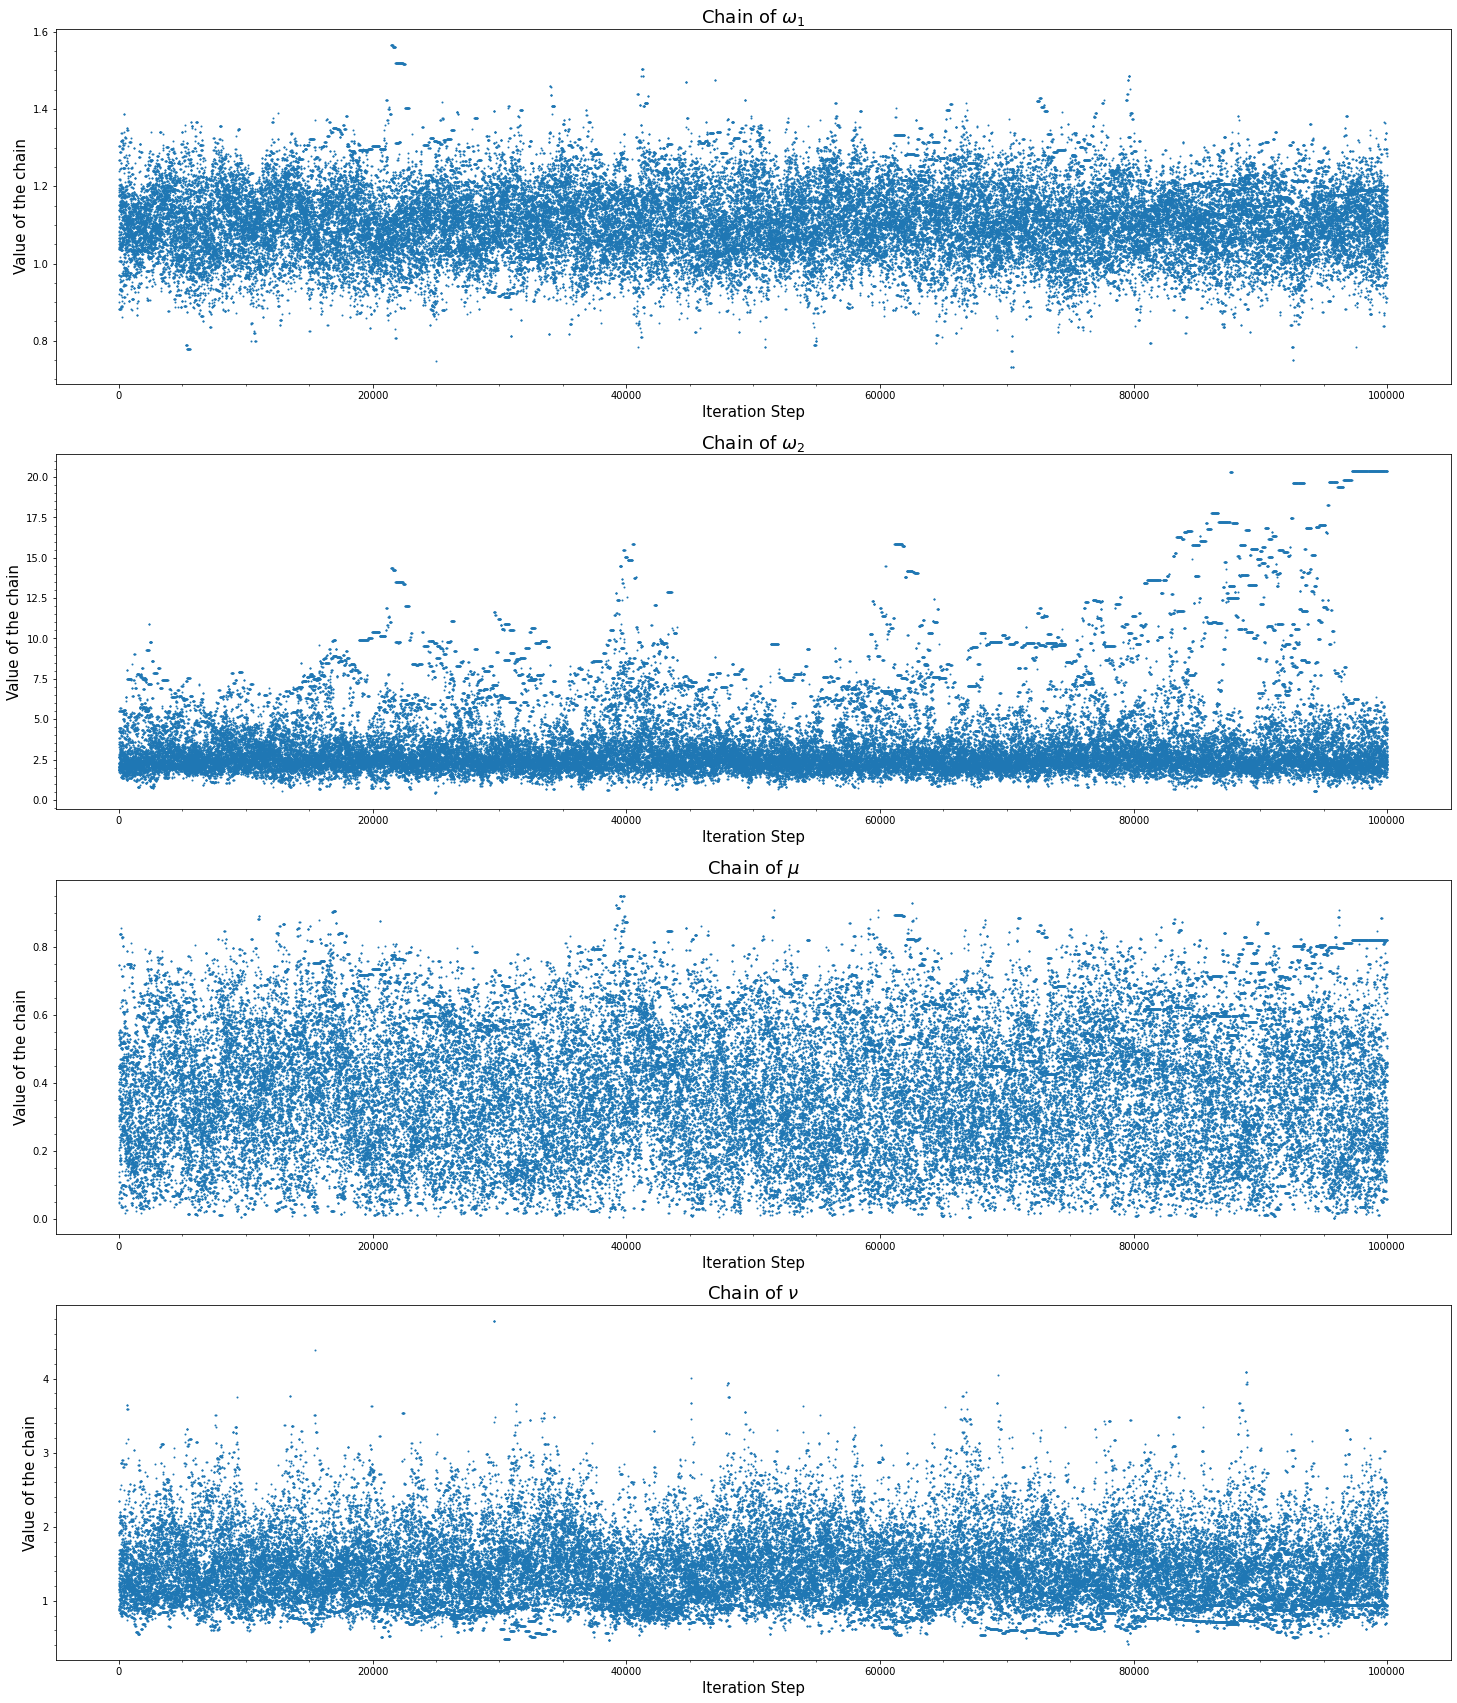

In [ ]:
fig, ax = chains_plot(chain)

## Model 1

In [ ]:
'''
Cell size evolution x(t)
'''
def x_function(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    x_ = (xb)*np.exp(omega1*t)
    return x_


'''
Hazard rate function h(t)
'''
def h(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    h_ = omega2*((x_function(t, pars) + nu)/(mu+nu)) # if x(t) ≥ mu
    h_[x_function(t, pars) < mu] = 0                 # if x(t) < mu
    
    return h_


'''
Survival function s(t) for a float t
'''
def CDF_float(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    # threshold time
    t0 = max([0, ((1.0/omega1) * np.log(mu/xb))])

    if t>=t0:
        ln_s_ = - ( (xb/(mu+nu)) * (omega2/omega1) * (np.exp(omega1*t)-np.exp(omega1*t0)) +\
                    (nu/(mu+nu)) * omega2 * (t-t0) )
    else:
        ln_s_ = 0
        

    s_ = np.exp(ln_s_)

    return s_


'''
Survival function s(t) for an array t
'''
def CDF_arr(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    # threshold time
    t0 = max([0, (1.0/omega1) * np.log(mu/xb)])
    
    ln_s_ = - ( (xb/(mu+nu)) * (omega2/omega1) * (np.exp(omega1*t)-np.exp(omega1*t0)) + (nu/(mu+nu)) * omega2 * (t-t0) )
    ln_s_[t < t0] = 0                 # if x(t) < mu

    s_ = np.exp(ln_s_)
    return s_

    
'''
Survival function s(t)
'''
def CDF(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    if type(t) == np.ndarray: # array
        s_ = CDF_arr(t, pars)
    else: # float
        s_ = CDF_float(t, pars)

    return s_

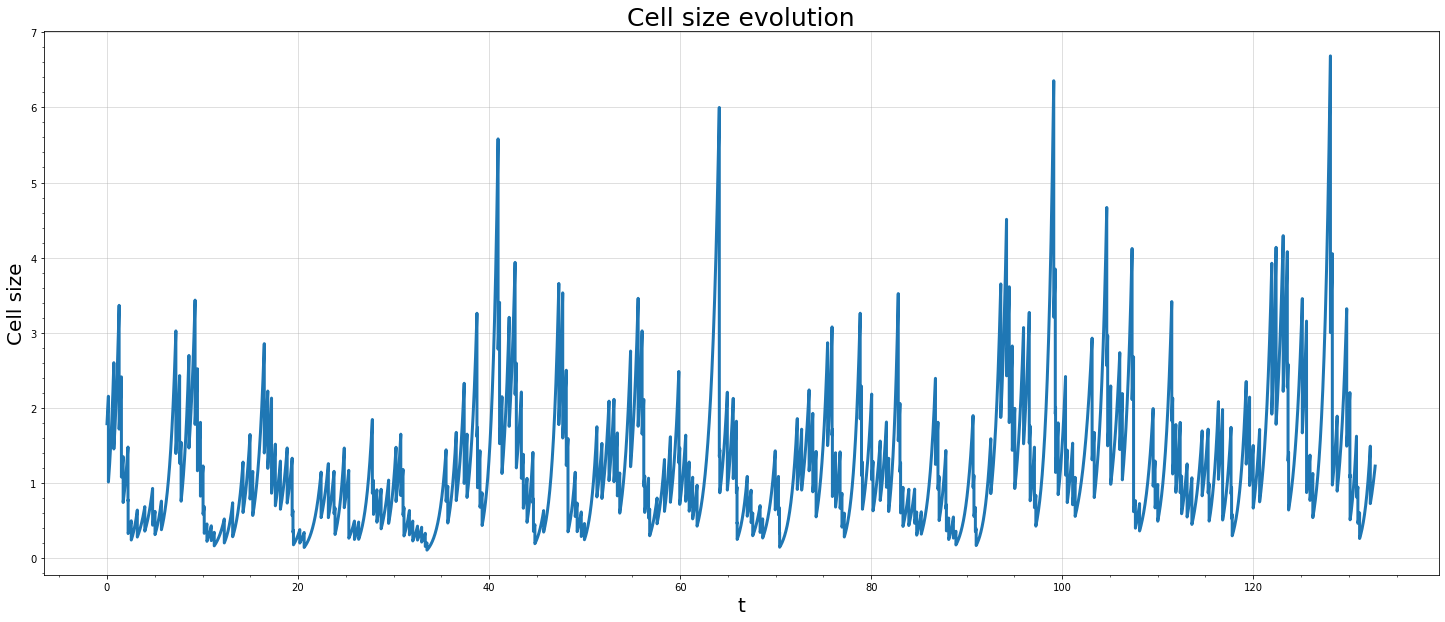

In [ ]:
sim_t_1, all_times_1, cell_sizes_1 = sim_t_draw(CDF=CDF, x_function=x_function, points_per_evolution=points_per_evolution, xb=xb, model='1')

fig, ax = plot_evol(all_times=all_times_1, cell_sizes=cell_sizes_1)



In [ ]:
def PDF(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    unnormalized = h(t, pars)*CDF(t, pars)
    idx = np.argsort(t)
    normalization = np.trapz(x=t[idx], y=unnormalized[idx])

    return(unnormalized/normalization)




In [ ]:



sampler = emcee.EnsembleSampler(n_walkers, 4, j_log_unnorm_posterior_emcee, kwargs={'y_times':sim_t_1, 'PDF':PDF}, a=2)
'''
3   is the number of dimensions in the parameter space
a=2 is the proposal scale parameter. (default: 2.0)
'''

pos, prob, state = sampler.run_mcmc(p0, 400)
sampler.reset()
sampler.run_mcmc(pos, 5000, rstate0=state)

chain = sampler.get_chain(flat=True)

'''
p0   is the initial state
5000 is the number of steps to run
'''

<ipython-input-33-c98fce3d07e4>:51: RuntimeWarning: invalid value encountered in log
  t0 = max([0, (1.0/omega1) * np.log(mu/xb)])
<ipython-input-21-dda3de5c4b0f>:8: RuntimeWarning: divide by zero encountered in log
  ret = np.sum(np.log(PDF(y_times, pars=(omega_1, omega_2, u, nu, 1)))) + np.log(prior_mu(u)) + np.log(prior_omega1(omega_1)) + np.log(prior_nu(nu))
<ipython-input-21-dda3de5c4b0f>:10: RuntimeWarning: invalid value encountered in double_scalars
  if ret*0 ==0:
<ipython-input-21-dda3de5c4b0f>:8: RuntimeWarning: invalid value encountered in log
  ret = np.sum(np.log(PDF(y_times, pars=(omega_1, omega_2, u, nu, 1)))) + np.log(prior_mu(u)) + np.log(prior_omega1(omega_1)) + np.log(prior_nu(nu))
<ipython-input-33-c98fce3d07e4>:56: RuntimeWarning: overflow encountered in exp
  s_ = np.exp(ln_s_)
<ipython-input-35-00aca6c3ed82>:8: RuntimeWarning: invalid value encountered in true_divide
  return(unnormalized/normalization)
<ipython-input-35-00aca6c3ed82>:4: RuntimeWarning: overflow 

'\np0   is the initial state\n5000 is the number of steps to run\n'

Median value of omega_1: 1.0697
Max value of omega_1: 1.038


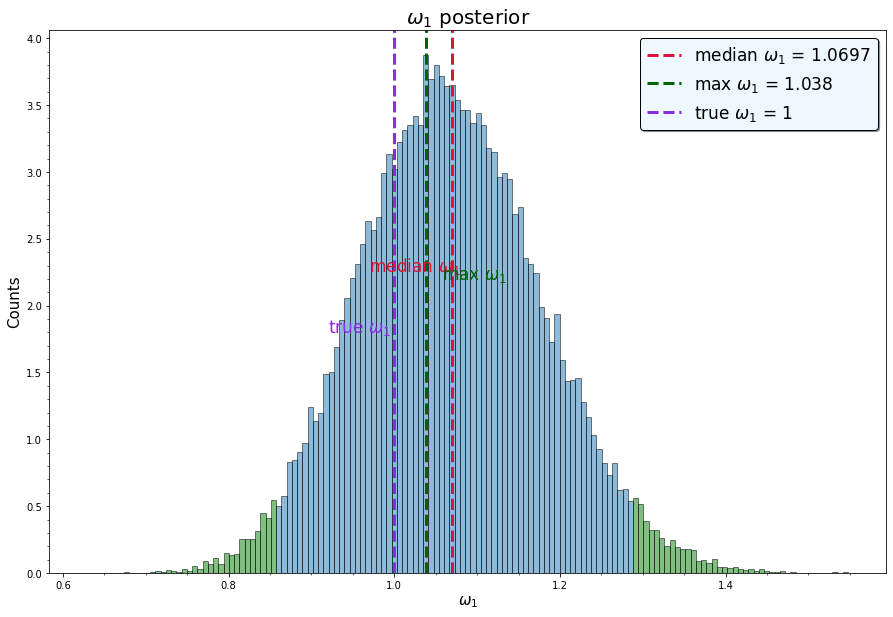

In [ ]:
fig, ax, centers_omega_1, counts_omega_1 = plot_func(chain= chain, true_value=1, parameter='omega_1')

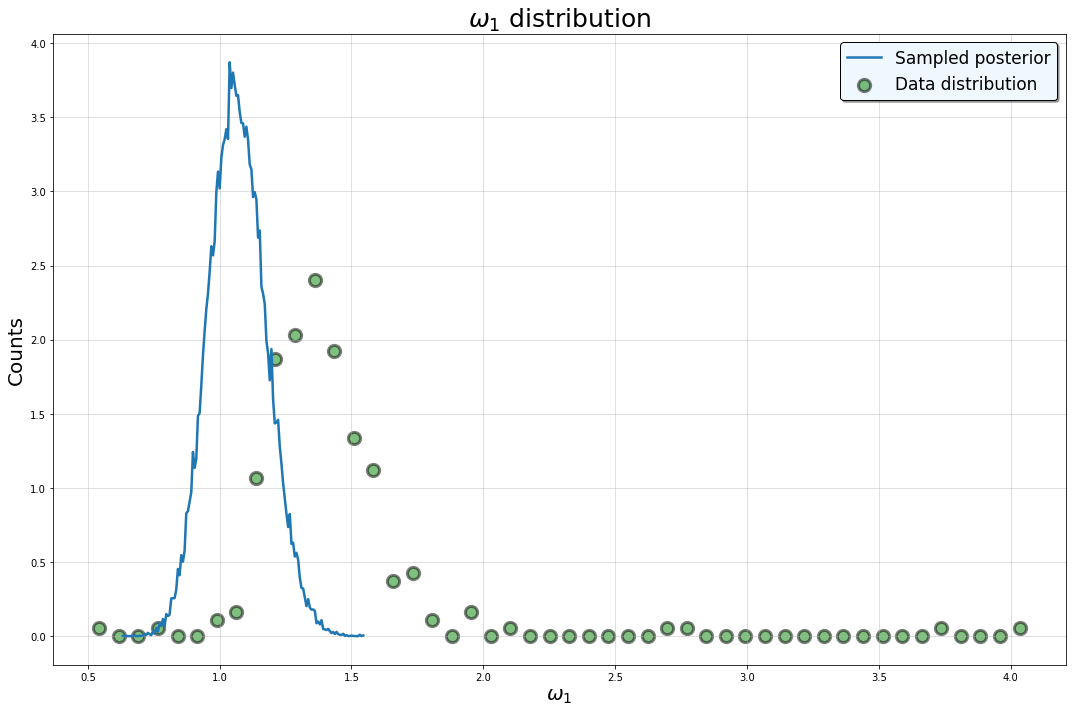

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(15, 10))
ax.plot(centers_omega_1, counts_omega_1, label = 'Sampled posterior', linewidth=2.5)
ax.scatter(grow_centers, hist_val_grow[0], linewidth=3, s=150, color='green', edgecolor = 'black', alpha=0.5, label='Data distribution')
ax.legend(fontsize=17, facecolor='aliceblue', shadow = True, edgecolor='black')
ax.grid(alpha=0.5)
ax.set_xlabel('$\omega_1$', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.set_title('$\omega_1$ distribution', fontsize = 25)
fig.tight_layout()

Median value of omega_1: 1.1048
Max value of omega_1: 1.1323


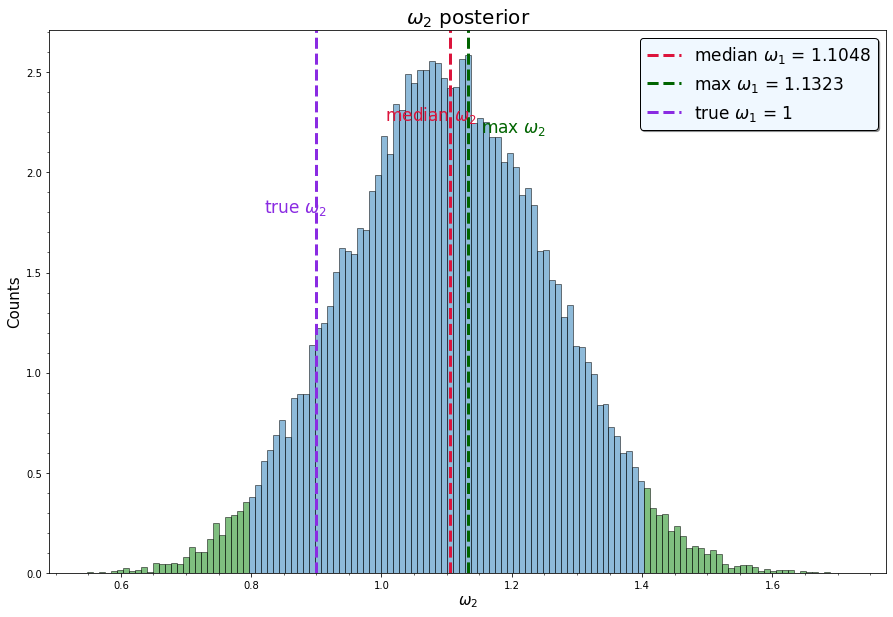

In [ ]:
fig, ax, _, _ = plot_func(chain= chain, true_value=0.9, parameter='omega_2')

Median value of omega_1: 0.2896
Max value of omega_1: 0.2291


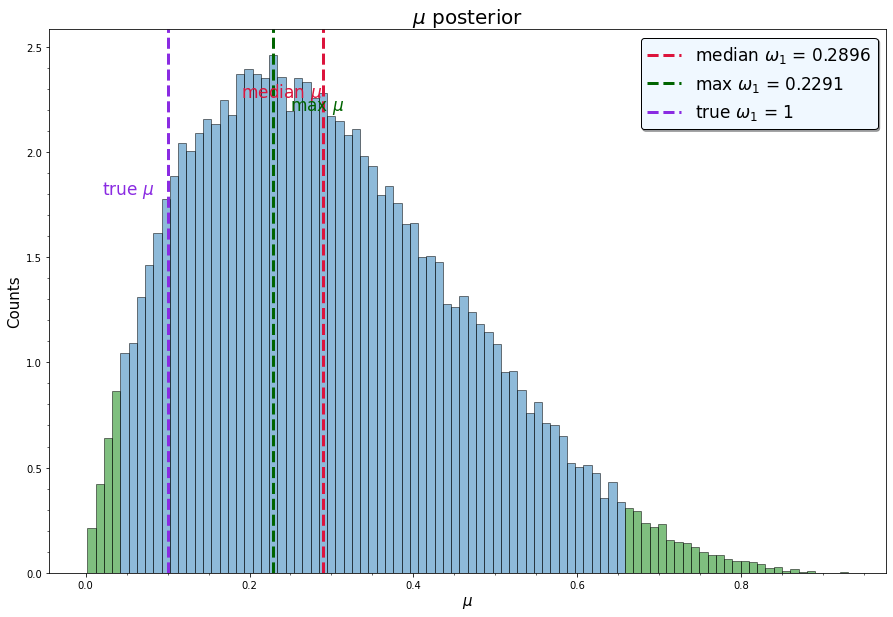

In [ ]:
fig, ax, _, _ = plot_func(chain= chain, true_value=0.1, parameter='mu')

Median value of omega_1: 1.8319
Max value of omega_1: 1.7062


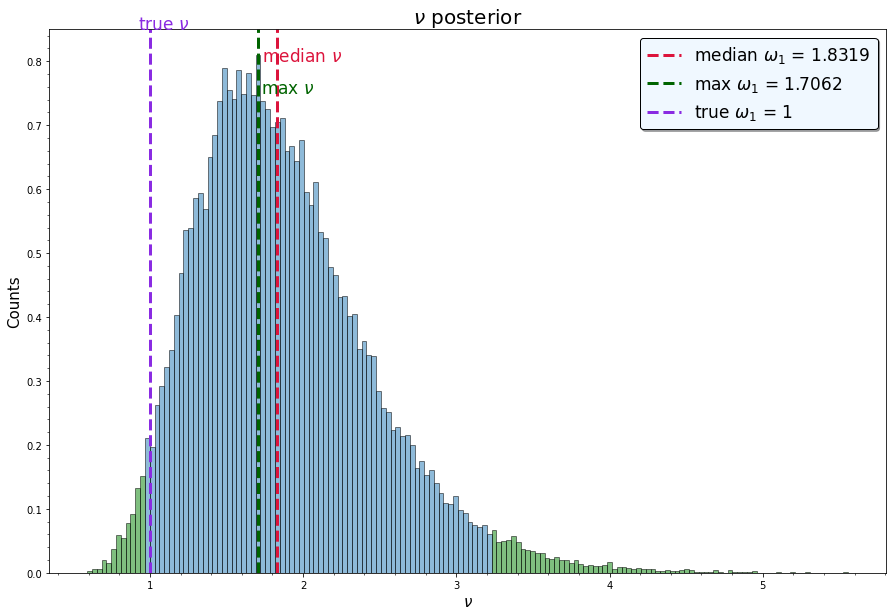

In [ ]:
fig, ax, _, _ = plot_func(chain= chain, true_value=1, parameter='nu', y_median=0.8, y_max=0.75, true_y=0.85)

### Actung!

/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: Th

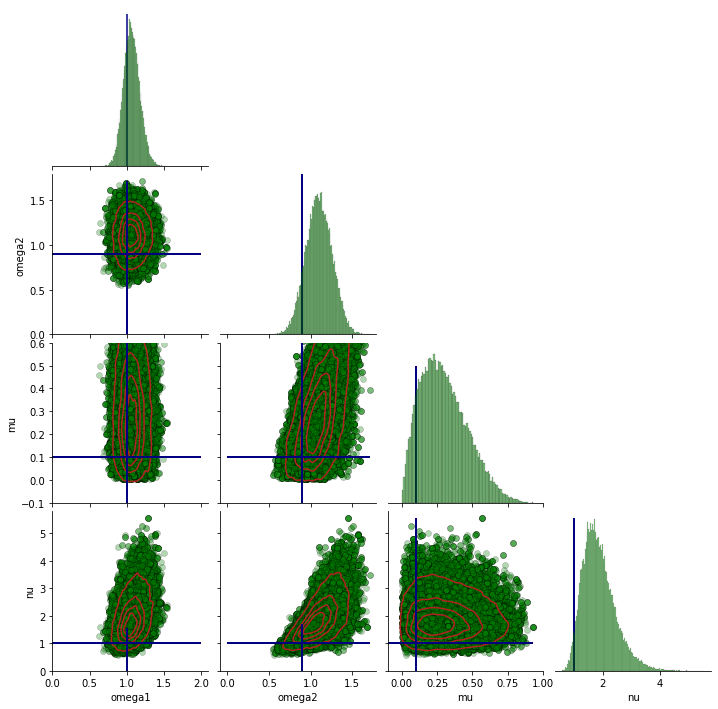

In [ ]:
g = pairplot(chain=chain)

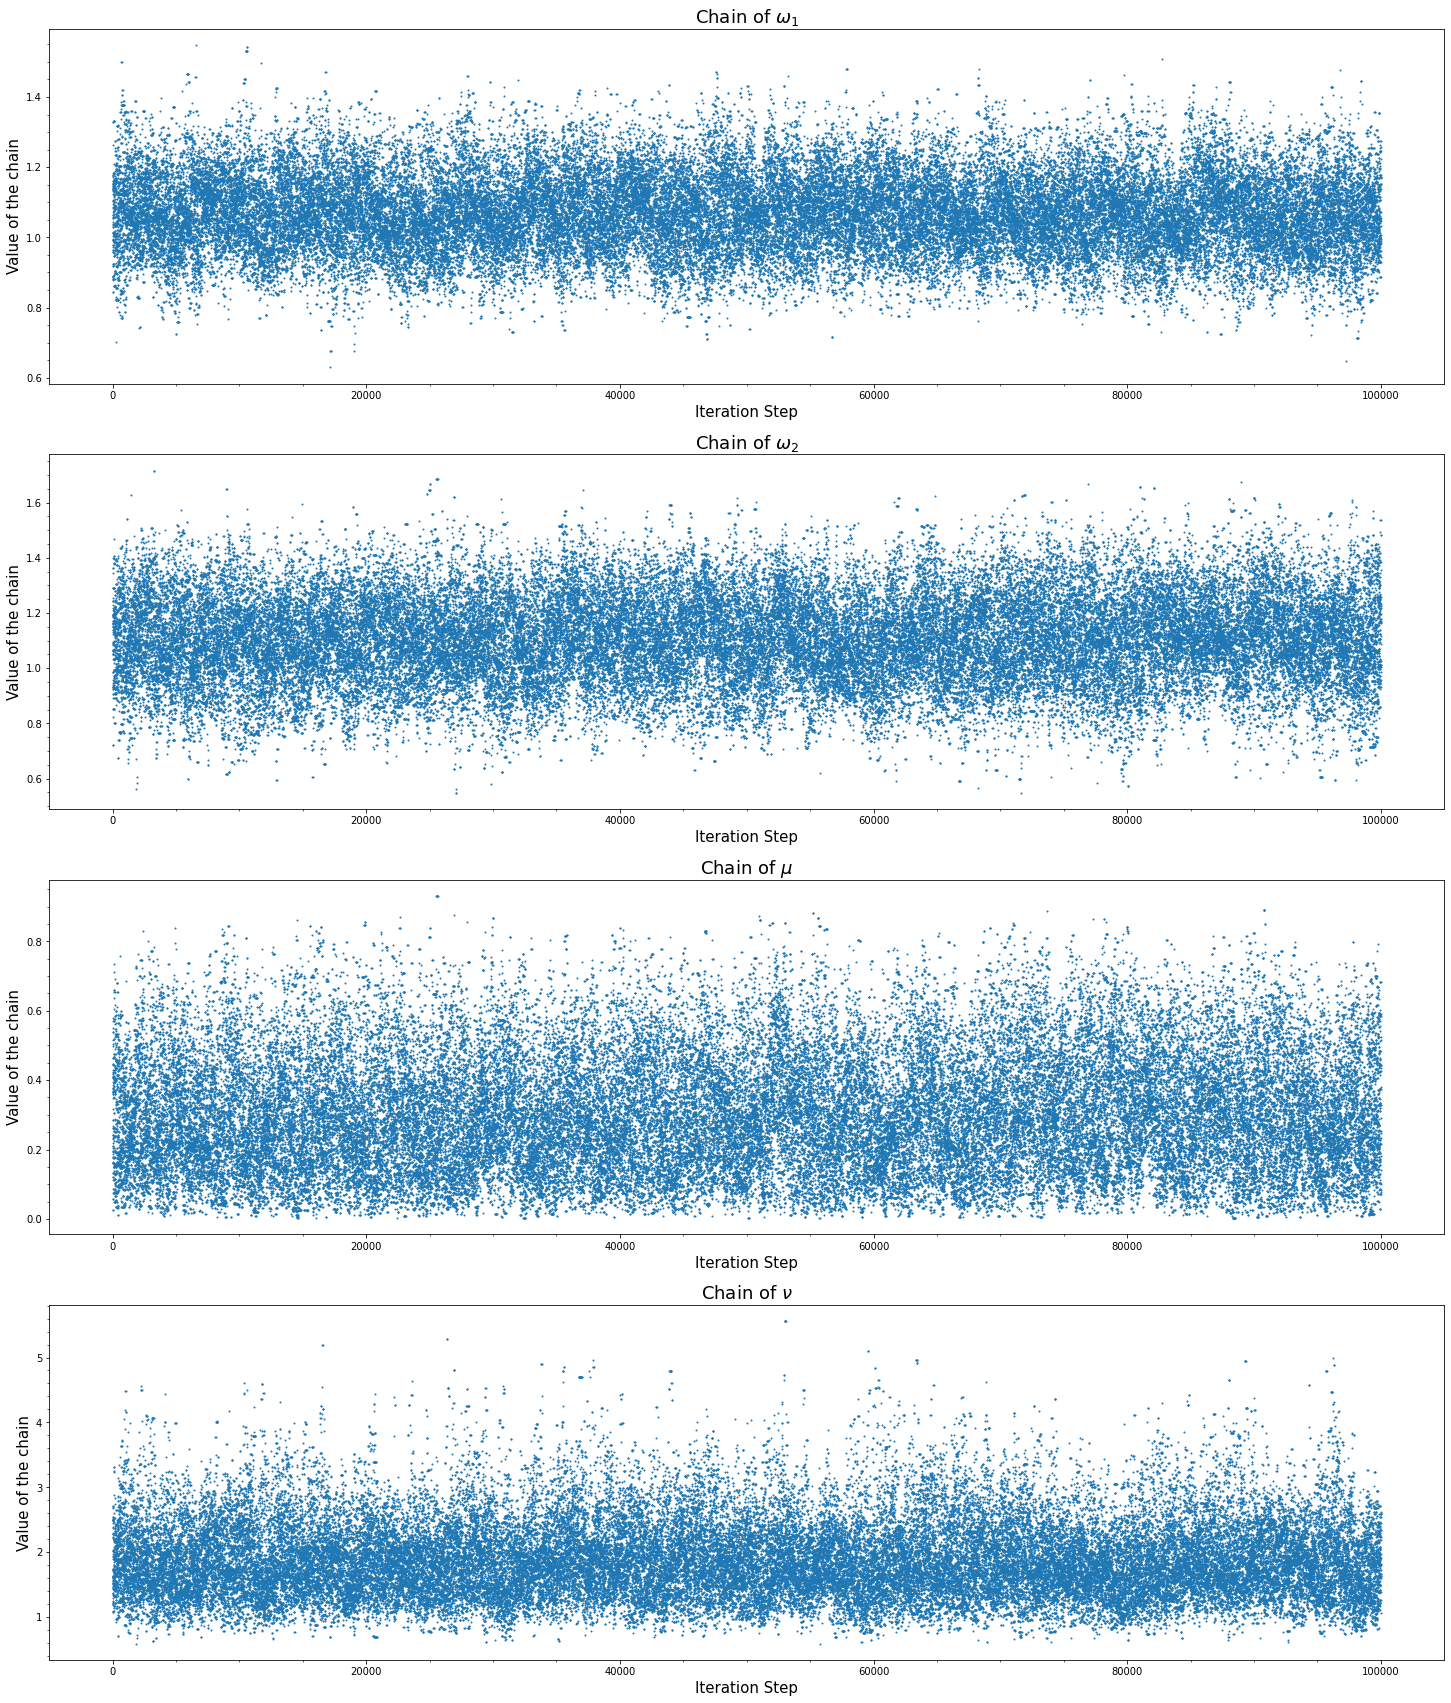

In [ ]:
fig, ax = chains_plot(chain)

## Model 2

In [ ]:
'''
Cell size evolution m(t)
'''
def m_function(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, mb) = pars

    m_ = (mb)*np.exp(omega1*t)
    return m_


'''
Protein content evolution p(t)
'''
def p_function(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, mb) = pars

    
    p_ = (mb)*(np.exp(omega1*t) - 1)
    return p_


'''
Hazard rate function h(t)
'''
def h(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, mb) = pars

    h_ = omega2*((p_function(t, pars) + nu)/(mu+nu)) # if p(t) ≥ mu
    h_[p_function(t, pars) < mu] = 0                 # if p(t) < mu
    
    return h_


'''
Survival function s(t) for a float t
'''
def CDF_float(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, mb) = pars

    # threshold time
    
    t0 = (1.0/omega1) * np.log(1 + (mu/mb))
    #t0 = max([0, (1.0/omega1) * np.log(1 + (mu/mb))])
    if t>=t0:
        ln_s_ = - ( (mb/(mu+nu)) * (omega2/omega1) * (np.exp(omega1*t)-np.exp(omega1*t0)) +\
                    ((nu-mb)/(mu+nu)) * omega2 * (t-t0) )
        #ln_s_ =  ( (mb/(mu+nu)) * (omega2/omega1) * (np.exp(omega1*t0)-np.exp(omega1*t)) +\
        #            ((mu-mb)/(mu+nu)) * omega2 * (t0-t) )
    else:
        ln_s_ = 0
        

    s_ = np.exp(ln_s_)

    return s_


'''
Survival function s(t) for an array t
'''
# threshold time

def CDF_arr(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, mb) = pars

    t0 = (1.0/omega1) * np.log(1 + (mu/mb))
    #t0 = max([0, (1.0/omega1) * np.log(1 + (mu/mb))])

    ln_s_ = - ( (mb/(mu+nu)) * (omega2/omega1) * (np.exp(omega1*t)-np.exp(omega1*t0)) +((nu-mb)/(mu+nu)) * omega2 * (t-t0) )
    #ln_s_ = - ( (mb/(mu+nu)) * (omega2/omega1) * (np.exp(omega1*t)-np.exp(omega1*t0)) +((mu-mb)/(mu+nu)) * omega2 * (t-t0) )
    
    
    ln_s_[t < t0] = 0                 # if p(t) < mu

    s_ = np.exp(ln_s_)

    return s_


'''
Survival function s(t)
'''
def CDF(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, mb) = pars

    if type(t) == np.ndarray: # array
        s_ = CDF_arr(t, pars)
    else: # float
        s_ = CDF_float(t, pars)

    return s_

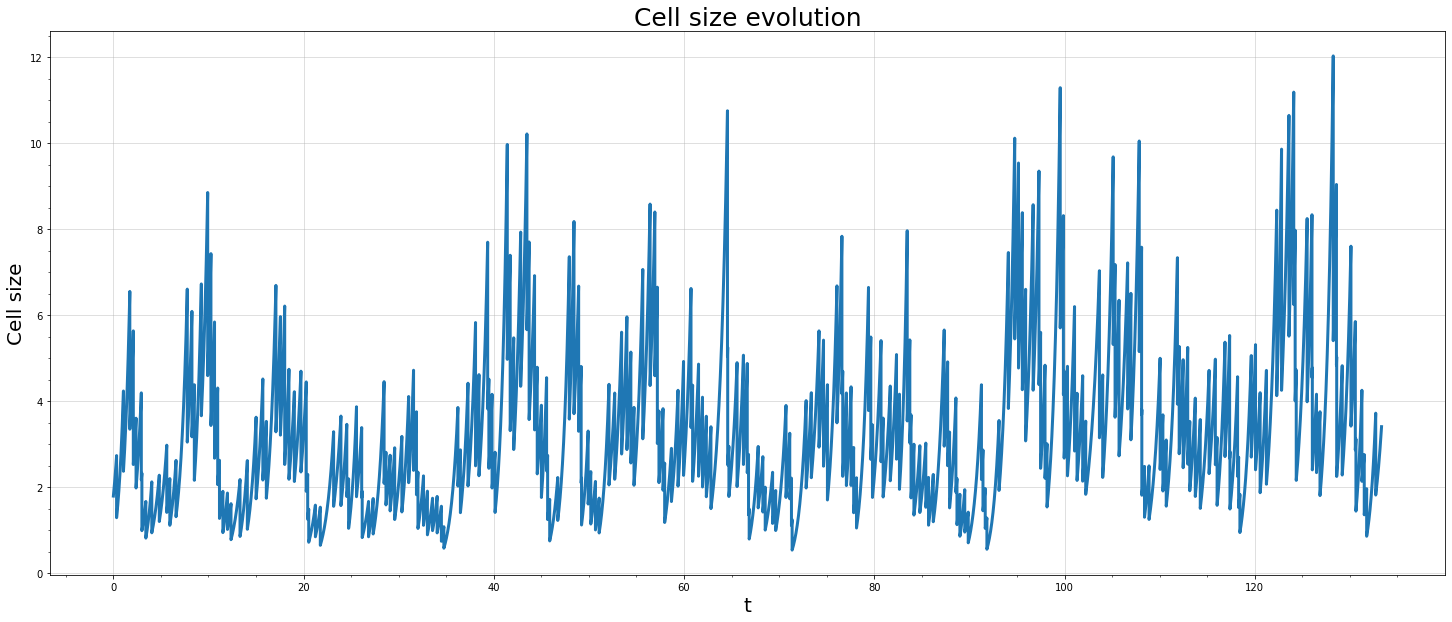

In [ ]:
sim_t_2, all_times_2, cell_sizes_2 = sim_t_draw(CDF=CDF, x_function=x_function, points_per_evolution=points_per_evolution, xb=xb, model='2')

fig, ax = plot_evol(all_times=all_times_2, cell_sizes=cell_sizes_2)



In [ ]:
def PDF(t, pars=(1,0.9,0.1,1,1)):
    (omega1, omega2, mu, nu, xb) = pars

    unnormalized = h(t, pars)*CDF(t, pars)
    idx = np.argsort(t)
    normalization = np.trapz(x=t[idx], y=unnormalized[idx])

    return(unnormalized/normalization)

In [ ]:


sampler = emcee.EnsembleSampler(n_walkers, 4, j_log_unnorm_posterior_emcee, kwargs={'y_times':sim_t_2, 'PDF':PDF}, a=2)
'''
3   is the number of dimensions in the parameter space
a=2 is the proposal scale parameter. (default: 2.0)
'''

pos, prob, state = sampler.run_mcmc(p0, 400)
sampler.reset()
sampler.run_mcmc(pos, 5000, rstate0=state)



'''
p0   is the initial state
5000 is the number of steps to run
'''

<ipython-input-21-dda3de5c4b0f>:8: RuntimeWarning: divide by zero encountered in log
  ret = np.sum(np.log(PDF(y_times, pars=(omega_1, omega_2, u, nu, 1)))) + np.log(prior_mu(u)) + np.log(prior_omega1(omega_1)) + np.log(prior_nu(nu))
<ipython-input-21-dda3de5c4b0f>:10: RuntimeWarning: invalid value encountered in double_scalars
  if ret*0 ==0:
/root/venv/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
<ipython-input-21-dda3de5c4b0f>:8: RuntimeWarning: invalid value encountered in log
  ret = np.sum(np.log(PDF(y_times, pars=(omega_1, omega_2, u, nu, 1)))) + np.log(prior_mu(u)) + np.log(prior_omega1(omega_1)) + np.log(prior_nu(nu))
<ipython-input-44-0f459067baa0>:75: RuntimeWarning: overflow encountered in exp
  s_ = np.exp(ln_s_)
<ipython-input-46-325457283768>:4: RuntimeWarning: overflow encountered in multiply
  unnormalized = h(t, pars)*CDF(t, pars)
<ipython-input-46-3254572837

'\np0   is the initial state\n5000 is the number of steps to run\n'

In [ ]:
chain = sampler.get_chain(flat=False)

# remove outliers (stucked chains) and flatten 
chain = chain[:, np.invert(np.all(chain == chain[0], axis=0))].reshape(-1, 4)

Median value of omega_1: 1.3597
Max value of omega_1: 1.3597


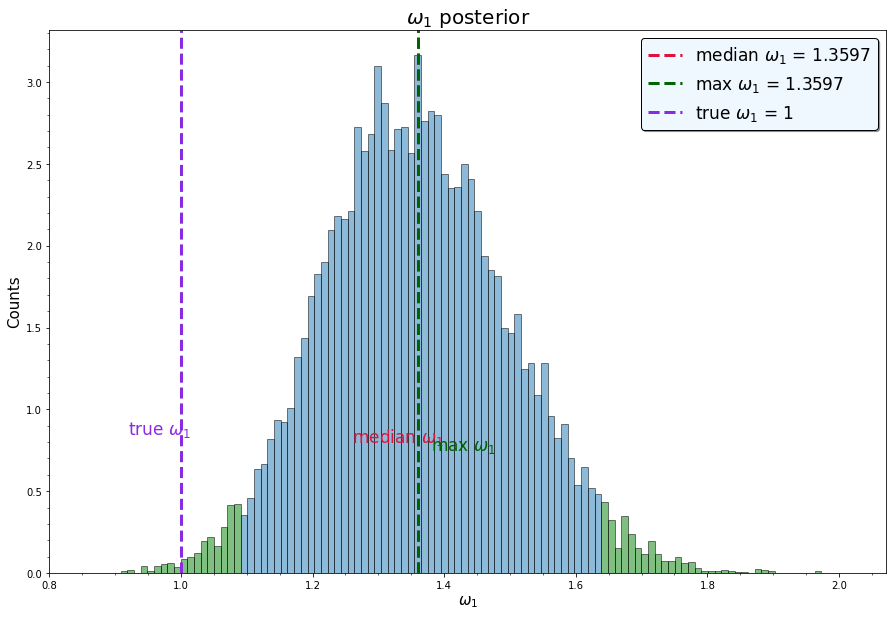

In [ ]:
fig, ax, centers_omega_1, counts_omega_1 = plot_func(chain= chain, true_value=1, parameter='omega_1', y_median=0.8, y_max=0.75, true_y=0.85)

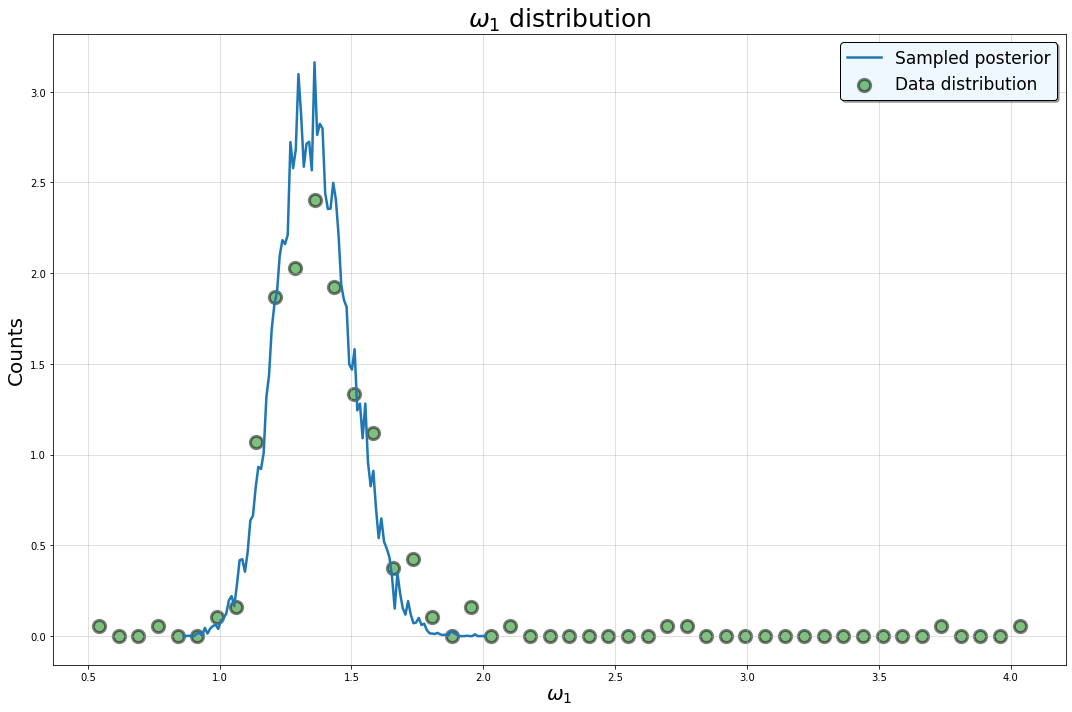

In [ ]:
fig, ax = plt.subplots(1,1 , figsize=(15, 10))
ax.plot(centers_omega_1, counts_omega_1, label = 'Sampled posterior', linewidth=2.5)
ax.scatter(grow_centers, hist_val_grow[0], linewidth=3, s=150, color='green', edgecolor = 'black', alpha=0.5, label='Data distribution')
ax.legend(fontsize=17, facecolor='aliceblue', shadow = True, edgecolor='black')
ax.grid(alpha=0.5)
ax.set_xlabel('$\omega_1$', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.set_title('$\omega_1$ distribution', fontsize = 25)
fig.tight_layout()

Median value of omega_1: 1.1342
Max value of omega_1: 1.1615


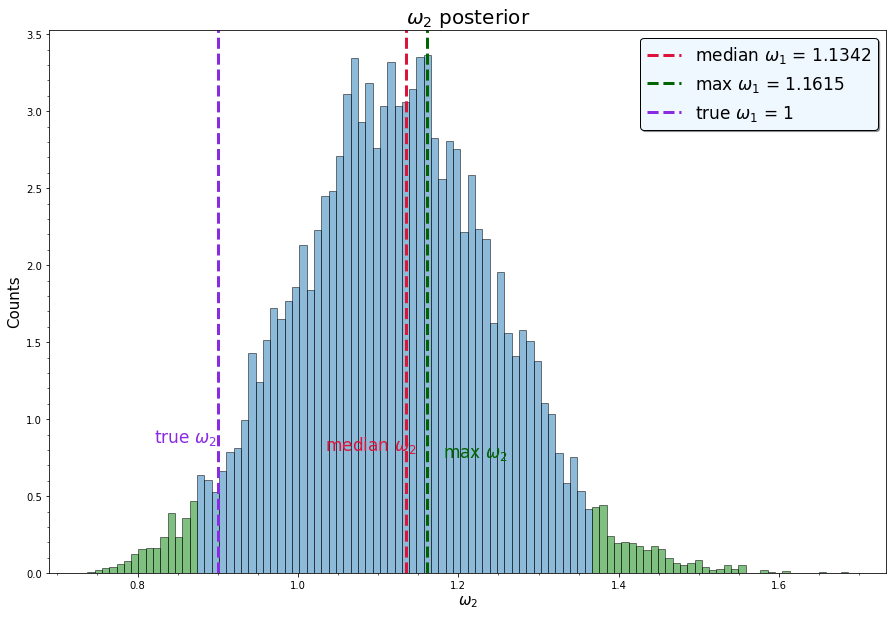

In [ ]:
fig, ax, _, _ = plot_func(chain= chain, true_value=0.9, parameter='omega_2', y_median=0.8, y_max=0.75, true_y=0.85)

Median value of omega_1: 0.0228
Max value of omega_1: 0.0247


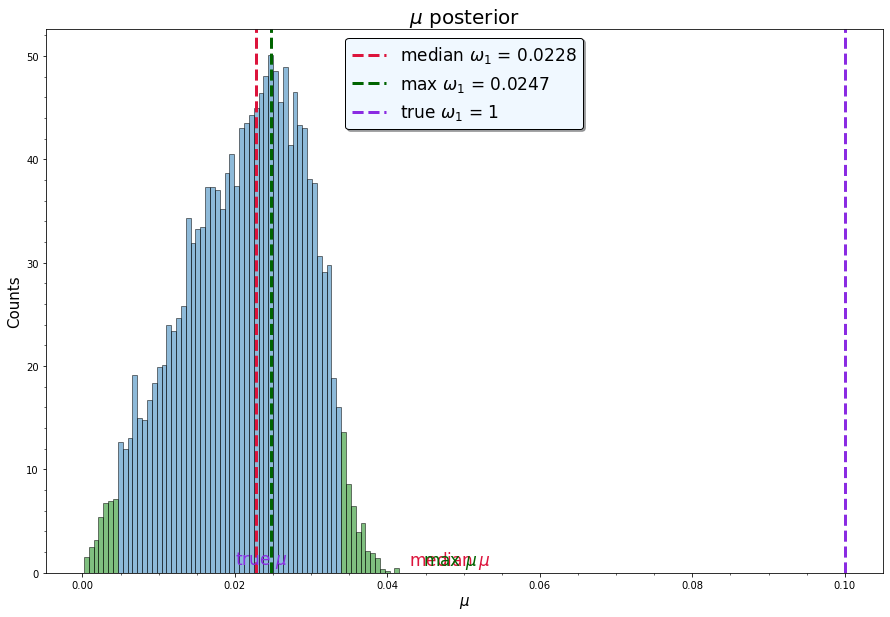

In [ ]:
fig, ax, _, _ = plot_func(chain= chain, true_value=0.1, parameter='mu', y_median=0.8, y_max=0.75, true_y=0.85, x_median = 0.02)

Median value of omega_1: 1.0802
Max value of omega_1: 0.949


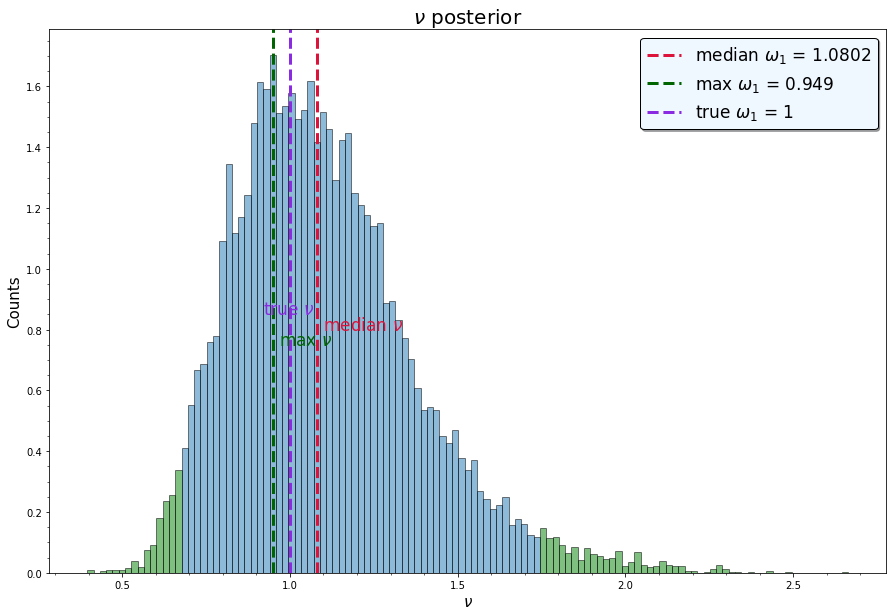

In [ ]:
fig, ax, _, _ = plot_func(chain= chain, true_value=1, parameter='nu', y_median=0.8, y_max=0.75, true_y=0.85, x_median = 0.02)

In [ ]:
## Actung !

/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/shared-libs/python3.8/py/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: Th

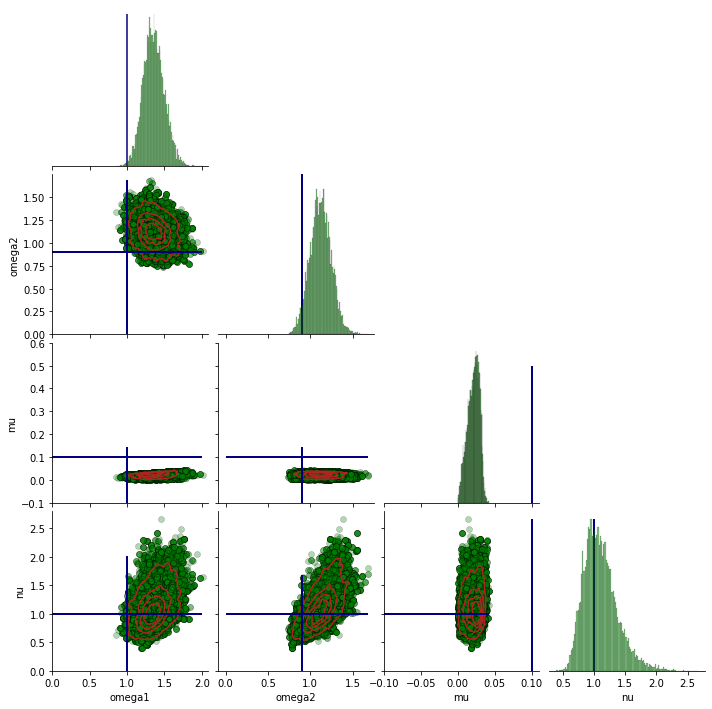

In [ ]:
g = pairplot(chain=chain)

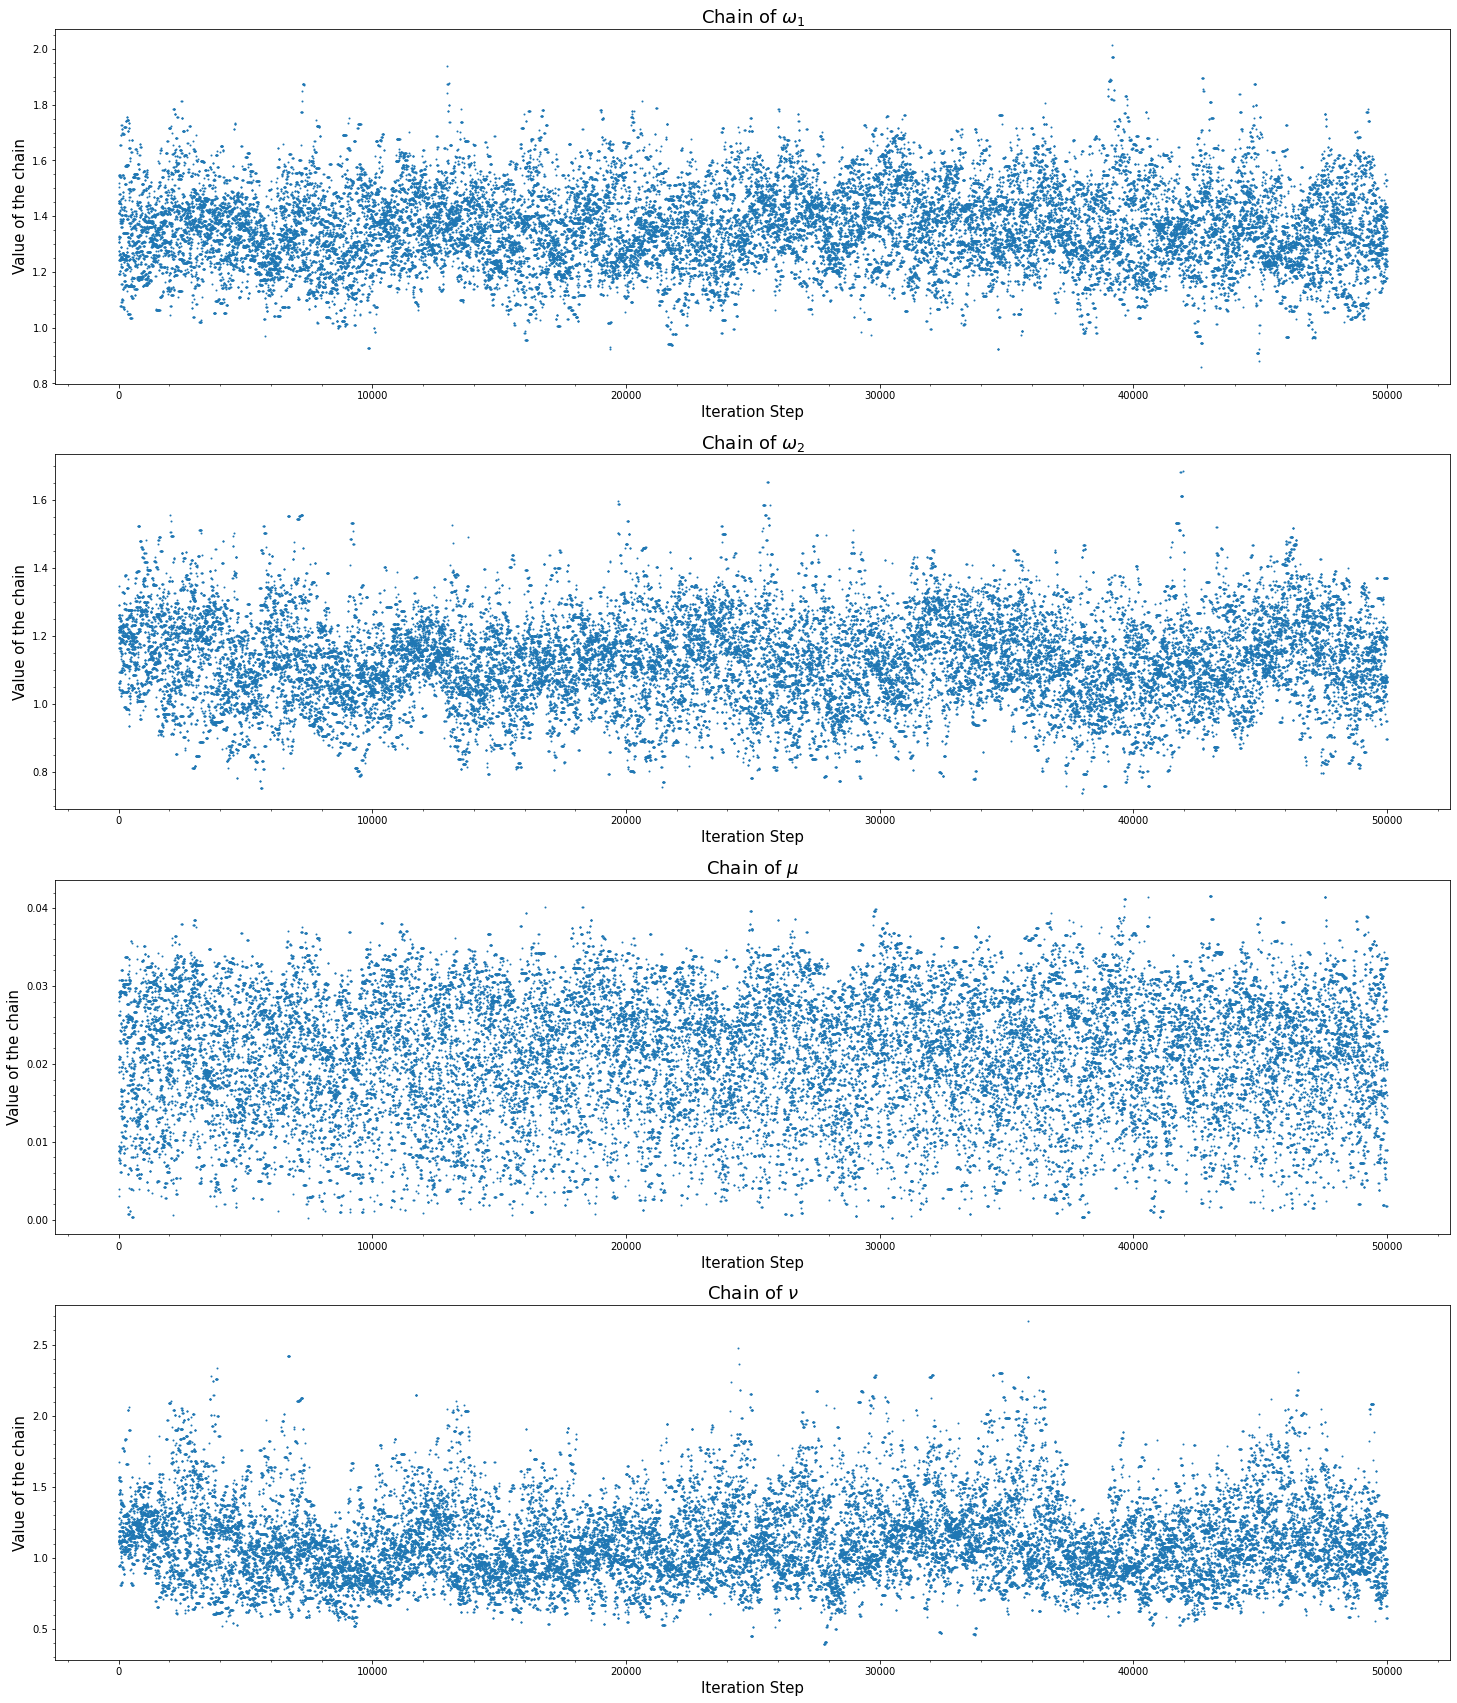

In [ ]:
fig, ax = chains_plot(chain)

In [ ]:
data_t = np.array(df_microbial_growth['generationtime'])

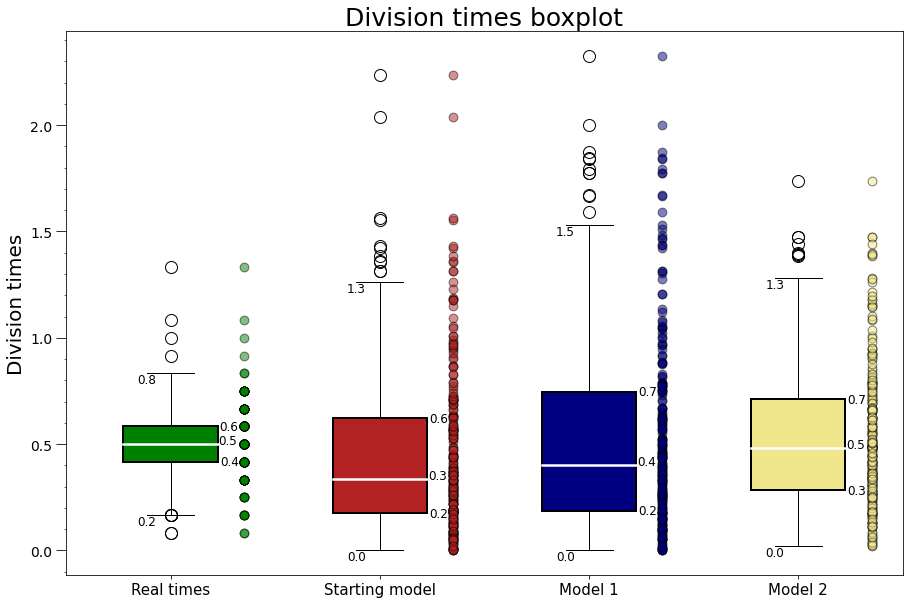

In [ ]:

res= boxplot.boxplot([data_t, sim_t_starting, sim_t_1, sim_t_2],['green', 'firebrick', 'navy', 'khaki'], \
                ylabel= 'Division times', y_font=20, title='Division times boxplot',  font_title = 25,\
                color_median='white', linewidth_median=2.5 ,labels=True, list_labels=['Real times', 'Starting model', 'Model 1', 'Model 2'], xlabel='')
fig, ax, bp = res[0], res[1], res[2]
ax.set_xticklabels(['Real times', 'Starting model', 'Model 1', 'Model 2'], fontdict={'fontsize':15})


for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] #  median line
    # overlay median value
    ax.text(x+0.05, y, '%.1f' % y,
         horizontalalignment='center', fontsize=12) # draw above, centered

for line in bp['caps']:
    x, y = line.get_xydata()[0] # bottom of left line
    ax.text(x,y, '%.1f' % y,
         horizontalalignment='center', # centered
         verticalalignment='top', fontsize=12)  
         

for line in bp['whiskers']:
    x, y = line.get_xydata()[0] # bottom of left line
    ax.text(x+0.28,y, '%.1f' % y,
         horizontalalignment='center', # centered
         verticalalignment='center', fontsize=12)   


    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52dba48d-3798-4665-95fc-01a96804955b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>